## Sara Ferrari, Michael Vizelman, Rachel Ward - DAV 6150 - Project 3

## Introduction

In this project we will be investigating how well algorithms based on gradient descent concepts perform relative to both each other and other types of models. To reach a conclusion we will be constructing and comparing the performance of a series of different models (a decision tree, a random forest, a stochastic gradient descent classifier, a gradient boosting classifier, and an XG boost classifier) using a data set that describes both the physical characteristics and prices of nearly 54,000 diamonds. For this project, the 'cut' (of a diamond) attribute (a multi-class categorical variable) will serve as the response variable for the models.

<ins>To accomplish our goal, we will perform the following steps:</ins>
- profiling the data set
- performing an Exploratory Data Analysis ("EDA") to identify some preliminary predictive inferences
- performing any necessary data preparation steps prior to constructing the models
- performing feature selection to identify variables we believe will prove to be useful within our models
- constructing and evaluating the following models:
    - a Decision Tree 
    - a Random Forest
    - a Stochastic Gradient Descent Classifier
    - a Gradient Boosting Classifier
    - an XG Boost Classifier
- comparing the performance of our models
- selecting the "best" classification model from those we have constructed
- applying the selected model to the testing subset
- offering conclusions


### Data Set Information
A description of the attributes represented within the data set can be found [here](https://ggplot2.tidyverse.org/reference/diamonds.html).  

<ins>The attributes in the dataset and their ranges of values are:</ins>
- **price**: price in US dollars (\\$326--\\$18,823)
- **carat**: weight of the diamond (0.2--5.01)
- **cut**: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- **color**: diamond color, from D (best) to J (worst)
- **clarity**: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- **x**: length in mm (0--10.74)
- **y**: width in mm (0--58.9)
- **z**: depth in mm (0--31.8)
- **depth**: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- **table**: width of top of diamond relative to widest point (43--95)

### Domain Knowledge Development

Taken from the education section of [The Diamond Pro website](https://www.diamonds.pro/).

- **carat** - Diamond weights are stated in metric carats, abbreviated “ct.” One metric carat is two-tenths (0.2) of a gram. Large high quality diamonds are rare and valuable gems. The relationship between rarity, weight, and value can be surprising. The price of a diamond depends on a number of variables — weight is just one of them, if a 1-carat diamond is worth, say, \\$6,000 ,a 2-carat diamond of similar quality might be worth \\$15,000 and not \\$12,000.
Large diamonds are more rare than small diamonds. The more scarce something is, the more it is worth. So a larger stone doesn't just cost more. It also costs more per carat.
- **cut** - Diamond Cut is how well a diamond is cut and polished, including how well-proportioned the stone is, its depth and symmetry. Diamond Cut does not refer to the shape of the diamond, such as an Oval or Pear Shape. Cut quality directly impacts the diamond's beauty and brilliance.

Two of the most important factors in determining the quality of a diamond's cut are its depth and table. 
- **depth (total depth percentage)**: The depth of a diamond refers to its measurement from top to bottom, from the table on the top of the diamond to the culet at its base. The depth of any diamond is expressed as a percentage.
Depth percentage is calculated by dividing the diamond's total height by its average width. The deeper the diamond's depth, the higher the diamond's depth percentage. Great diamonds are all about proportion. When a diamond has the right combination of depth and table percentages, it's more capable of taking in and reflecting light. 
- **table**: A diamond's table is the flat facet on its surface — the large, flat surface facet that you can see when you look at the diamond from above. As the largest facet on a diamond, the table plays a major role in determining how brilliant the diamond is. 

## Exploratory Data Analysis 

In this section we will first read in the dataset, then rename columns as appropriate, check for missing values, and get the summary statistics of our variables. We will then check for invalid values and remove any such values from our dataset. Then, we will perform EDA on each of our variables, looking at their distributions and checking the correlations between numeric variables and chi-square test of independence scores for each of the categorical variables.  

In [1]:
#import necessary libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read in the file
Project3_data_file = 'https://raw.githubusercontent.com/vizelman/DAV-6150/master/Project3_Data.csv'
diamonds = pd.read_csv(Project3_data_file)

#check results
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
#check df shape
diamonds.shape

(53940, 10)

The shape of the data frame indicates the data was read in as expected, we have 10 variables and 53,940 observations. 

We will now change the names of some variables to more meaningful names, then look at summary statistics of the variables, and check for missing values in the variables.

In [3]:
#rename some of the variables 
diamonds.rename(columns = {'depth': 'total_depth_percentage',
                           'x':'length_mm',
                           'y':'width_mm',
                           'z':'depth_mm'}, inplace = True)

#change order of the columns with the target variable last
diamonds = diamonds[['carat', 'length_mm', 'width_mm', 'depth_mm', 
                     'total_depth_percentage', 'table', 'price', 'color', 'clarity', 'cut']]

#check results
diamonds.head()

,carat,length_mm,width_mm,depth_mm,total_depth_percentage,table,price,color,clarity,cut
0,0.23,3.95,3.98,2.43,61.5,55.0,326,E,SI2,Ideal
1,0.21,3.89,3.84,2.31,59.8,61.0,326,E,SI1,Premium
2,0.23,4.05,4.07,2.31,56.9,65.0,327,E,VS1,Good
3,0.29,4.20,4.23,2.63,62.4,58.0,334,I,VS2,Premium
4,0.31,4.34,4.35,2.75,63.3,58.0,335,J,SI2,Good


In [4]:
#get summary statistics for each column
diamonds.describe()

,carat,length_mm,width_mm,depth_mm,total_depth_percentage,table,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,5.731157,5.734526,3.538734,61.749405,57.457184,3932.799722
std,0.474011,1.121761,1.142135,0.705699,1.432621,2.234491,3989.439738
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000
25%,0.400000,4.710000,4.720000,2.910000,61.000000,56.000000,950.000000
50%,0.700000,5.700000,5.710000,3.530000,61.800000,57.000000,2401.000000
75%,1.040000,6.540000,6.540000,4.040000,62.500000,59.000000,5324.250000
max,5.010000,10.740000,58.900000,31.800000,79.000000,95.000000,18823.000000


From the above we see that there are diamonds with length, width, and depth measurements of zero. However, the minimum carat value is 0.2. This does not make sense, as you cannot have a diamond with measurements of zero. 

Additionally, we see that the maximum width is almost 60mm, this also does not make any sense since the maximum carat weight of a diamond in our sample is 5. Per [our research](https://www.diamonds.pro/education/carat-weight/), a diamond with 5 carat weight should be approximately 11mm in width. 

Furthermore, for similar reasons, we believe a depth of 31.8mm might also be invalid. 

We will now take a closer look at these observations.  

In [5]:
#check for possibly invalid observations - diamonds with zero measurements
zero_dimensions = diamonds[((diamonds['length_mm'] == 0) | (diamonds['width_mm'] == 0) | (diamonds['depth_mm'] == 0))]
#check results
zero_dimensions

,carat,length_mm,width_mm,depth_mm,total_depth_percentage,table,price,color,clarity,cut
2207,1.00,6.55,6.48,0.0,59.1,59.0,3142,G,SI2,Premium
2314,1.01,6.66,6.60,0.0,58.1,59.0,3167,H,I1,Premium
4791,1.10,6.50,6.47,0.0,63.0,59.0,3696,G,SI2,Premium
5471,1.01,6.50,6.47,0.0,59.2,58.0,3837,F,SI2,Premium
10167,1.50,7.15,7.04,0.0,64.0,61.0,4731,G,I1,Good
11182,1.07,0.00,6.62,0.0,61.6,56.0,4954,F,SI2,Ideal
11963,1.00,0.00,0.00,0.0,63.3,53.0,5139,H,VS2,Very Good
13601,1.15,6.88,6.83,0.0,59.2,56.0,5564,G,VS2,Ideal
15951,1.14,0.00,0.00,0.0,57.5,67.0,6381,G,VS1,Fair
24394,2.18,8.49,8.45,0.0,59.4,61.0,12631,H,SI2,Premium


In [6]:
#check for possibly invalid observations - diamonds with width above 11 mm or depth above 11 mm
odd_dimensions = diamonds[((diamonds['width_mm'] > 11) | (diamonds['depth_mm'] >11))]
#check results
odd_dimensions

,carat,length_mm,width_mm,depth_mm,total_depth_percentage,table,price,color,clarity,cut
24067,2.00,8.09,58.90,8.06,58.9,57.0,12210,H,SI2,Premium
48410,0.51,5.12,5.15,31.80,61.8,54.7,1970,E,VS1,Very Good
49189,0.51,5.15,31.80,5.12,61.8,55.0,2075,E,VS1,Ideal


From the above, we see that there are 20 observations in the sample that have at least one zero size measure. These observations are clearly invalid, there is no such thing as a diamond with zero length or width or depth. 

Furthermore, we see there are 3 observations where either the width or depth is greater than 11mm. Looking at the observations in more detail, we believe these are also invalid for the reasons stated above.

We will now remove these observations from our sample.

In [7]:
#create new diamonds data frame
diamonds_new = diamonds.copy()

#save index of invalid observations
invalid_index = zero_dimensions.index
invalid_index2 = odd_dimensions.index

#drop invalid observations
diamonds_new.drop(invalid_index,inplace=True)
diamonds_new.drop(invalid_index2,inplace=True)

#reset the index
diamonds_new.reset_index(drop=True,inplace=True)

#check results
diamonds_new

,carat,length_mm,width_mm,depth_mm,total_depth_percentage,table,price,color,clarity,cut
0,0.23,3.95,3.98,2.43,61.5,55.0,326,E,SI2,Ideal
1,0.21,3.89,3.84,2.31,59.8,61.0,326,E,SI1,Premium
2,0.23,4.05,4.07,2.31,56.9,65.0,327,E,VS1,Good
3,0.29,4.20,4.23,2.63,62.4,58.0,334,I,VS2,Premium
4,0.31,4.34,4.35,2.75,63.3,58.0,335,J,SI2,Good
...,...,...,...,...,...,...,...,...,...,...
53912,0.72,5.75,5.76,3.50,60.8,57.0,2757,D,SI1,Ideal
53913,0.72,5.69,5.75,3.61,63.1,55.0,2757,D,SI1,Good
53914,0.70,5.66,5.68,3.56,62.8,60.0,2757,D,SI1,Very Good
53915,0.86,6.15,6.12,3.74,61.0,58.0,2757,H,SI2,Premium


We verified that the rows were properly deleted. Next we will check the calculations of the total_depth_percentage column since we were given the formula, to make sure that the original values were calculated correctly. 

In [8]:
#create new column with calculated total depth percentage
diamonds_new['calculated_total_depth_percentage'] = round((2*diamonds_new.depth_mm)/(diamonds_new.length_mm+diamonds_new.width_mm)*100,1)

#check for observations where the original value is different from the calculated value 
miscalculated_t_depth = diamonds_new[(diamonds_new['total_depth_percentage'] != diamonds_new['calculated_total_depth_percentage'])]

#check results
miscalculated_t_depth

,carat,length_mm,width_mm,depth_mm,total_depth_percentage,table,price,color,clarity,cut,calculated_total_depth_percentage
0,0.23,3.95,3.98,2.43,61.5,55.0,326,E,SI2,Ideal,61.3
96,0.70,5.71,5.76,3.40,59.4,62.0,2759,F,VS1,Good,59.3
97,0.96,6.27,5.95,4.07,66.3,62.0,2759,F,SI2,Fair,66.6
104,0.80,5.94,5.87,3.72,62.9,56.0,2760,I,VS1,Ideal,63.0
151,0.74,5.82,5.86,3.57,61.3,56.0,2769,I,SI1,Ideal,61.1
...,...,...,...,...,...,...,...,...,...,...,...
53780,0.90,6.07,6.02,3.86,63.8,56.0,2732,H,SI1,Good,63.9
53791,0.77,5.70,5.86,3.71,64.3,57.9,2734,H,VVS2,Good,64.2
53816,0.71,5.72,5.76,3.53,61.6,57.0,2738,G,SI1,Ideal,61.5
53840,1.00,6.22,6.12,4.13,66.8,56.0,2743,I,SI2,Fair,66.9


We see that there are over 3,700 rows where the given total_depth_percentage column is different from what we calculated ourselves. Given this, we feel more comfortable using our own calculated column since we can clearly explain where these numbers came from. It is more likely that a mistake was made in the calculation or rounding of total_depth_percentage rather than in one of the size measurements. We will now drop the total_depth_percentage column and move forward using our own calculated column. 

In [9]:
#drop original total_depth_percentage column
diamonds_new.drop(columns = 'total_depth_percentage', inplace=True)

We will now check the range of values in our new column to see if there are any more observations that do not make sense.  
The total_depth_percentage of a diamond should not be much lower than ~40% (based on [our research](https://www.diamonds.pro/education/diamond-depth-and-table/) the ideal total depth percentage would be between 59mm--75mm depending on the shape of the cut) otherwise it would mean the diamond is very wide and very flat which does not make much sense. The range of the original column total_depth_percentage was 43mm--79mm which is in keeping with the above. 

In [10]:
#check for new calculated_total_depth_percentage values that may indicate an invalid observation
odd_t_depth =  diamonds_new[(diamonds_new['calculated_total_depth_percentage']<40)]
#check results
odd_t_depth

,carat,length_mm,width_mm,depth_mm,table,price,color,clarity,cut,calculated_total_depth_percentage
14627,1.07,6.62,6.67,1.07,57.0,5909,F,SI1,Ideal,16.1
20685,1.53,7.43,7.50,1.53,54.0,8971,I,SI1,Ideal,20.5
21645,1.41,7.31,7.22,1.41,56.0,9752,H,VS1,Ideal,19.4


We see that there are only 3 observations where the calculated_total_depth_percentage is lower than 40% (much lower in fact). We can also see that the carat value is identical to the depth_mm value in all 3 of these observations. This leads us to believe that a data entry mistake was made in these observations and we will remove them from our sample.  

In [11]:
#save index of invalid observations
invalid_index3 = odd_t_depth.index

#drop invalid observations
diamonds_new.drop(invalid_index3,inplace=True)

#reset the index
diamonds_new.reset_index(drop=True,inplace=True)

#change order of the columns with the target variable last
diamonds_new = diamonds_new[['carat', 'length_mm', 'width_mm', 'depth_mm',
                             'calculated_total_depth_percentage', 'table', 'price',
                             'color', 'clarity', 'cut']]

#check results
diamonds_new

,carat,length_mm,width_mm,depth_mm,calculated_total_depth_percentage,table,price,color,clarity,cut
0,0.23,3.95,3.98,2.43,61.3,55.0,326,E,SI2,Ideal
1,0.21,3.89,3.84,2.31,59.8,61.0,326,E,SI1,Premium
2,0.23,4.05,4.07,2.31,56.9,65.0,327,E,VS1,Good
3,0.29,4.20,4.23,2.63,62.4,58.0,334,I,VS2,Premium
4,0.31,4.34,4.35,2.75,63.3,58.0,335,J,SI2,Good
...,...,...,...,...,...,...,...,...,...,...
53909,0.72,5.75,5.76,3.50,60.8,57.0,2757,D,SI1,Ideal
53910,0.72,5.69,5.75,3.61,63.1,55.0,2757,D,SI1,Good
53911,0.70,5.66,5.68,3.56,62.8,60.0,2757,D,SI1,Very Good
53912,0.86,6.15,6.12,3.74,61.0,58.0,2757,H,SI2,Premium


We verified that the rows were properly deleted. Next we will check for missing values in our data set.

In [12]:
#check the data set for missing (null) values
diamonds_new.isnull().sum()

carat                                0
length_mm                            0
width_mm                             0
depth_mm                             0
calculated_total_depth_percentage    0
table                                0
price                                0
color                                0
clarity                              0
cut                                  0
dtype: int64

From the above we have no missing values in our data set.

Since we have eliminated invalid observations we will not be eliminating further observations such as outliers. 

We will now look at the distributions of each of our variables. We will split this portion into numeric data for which we will plot histograms, and categorical data for which we will plot bar plots. 

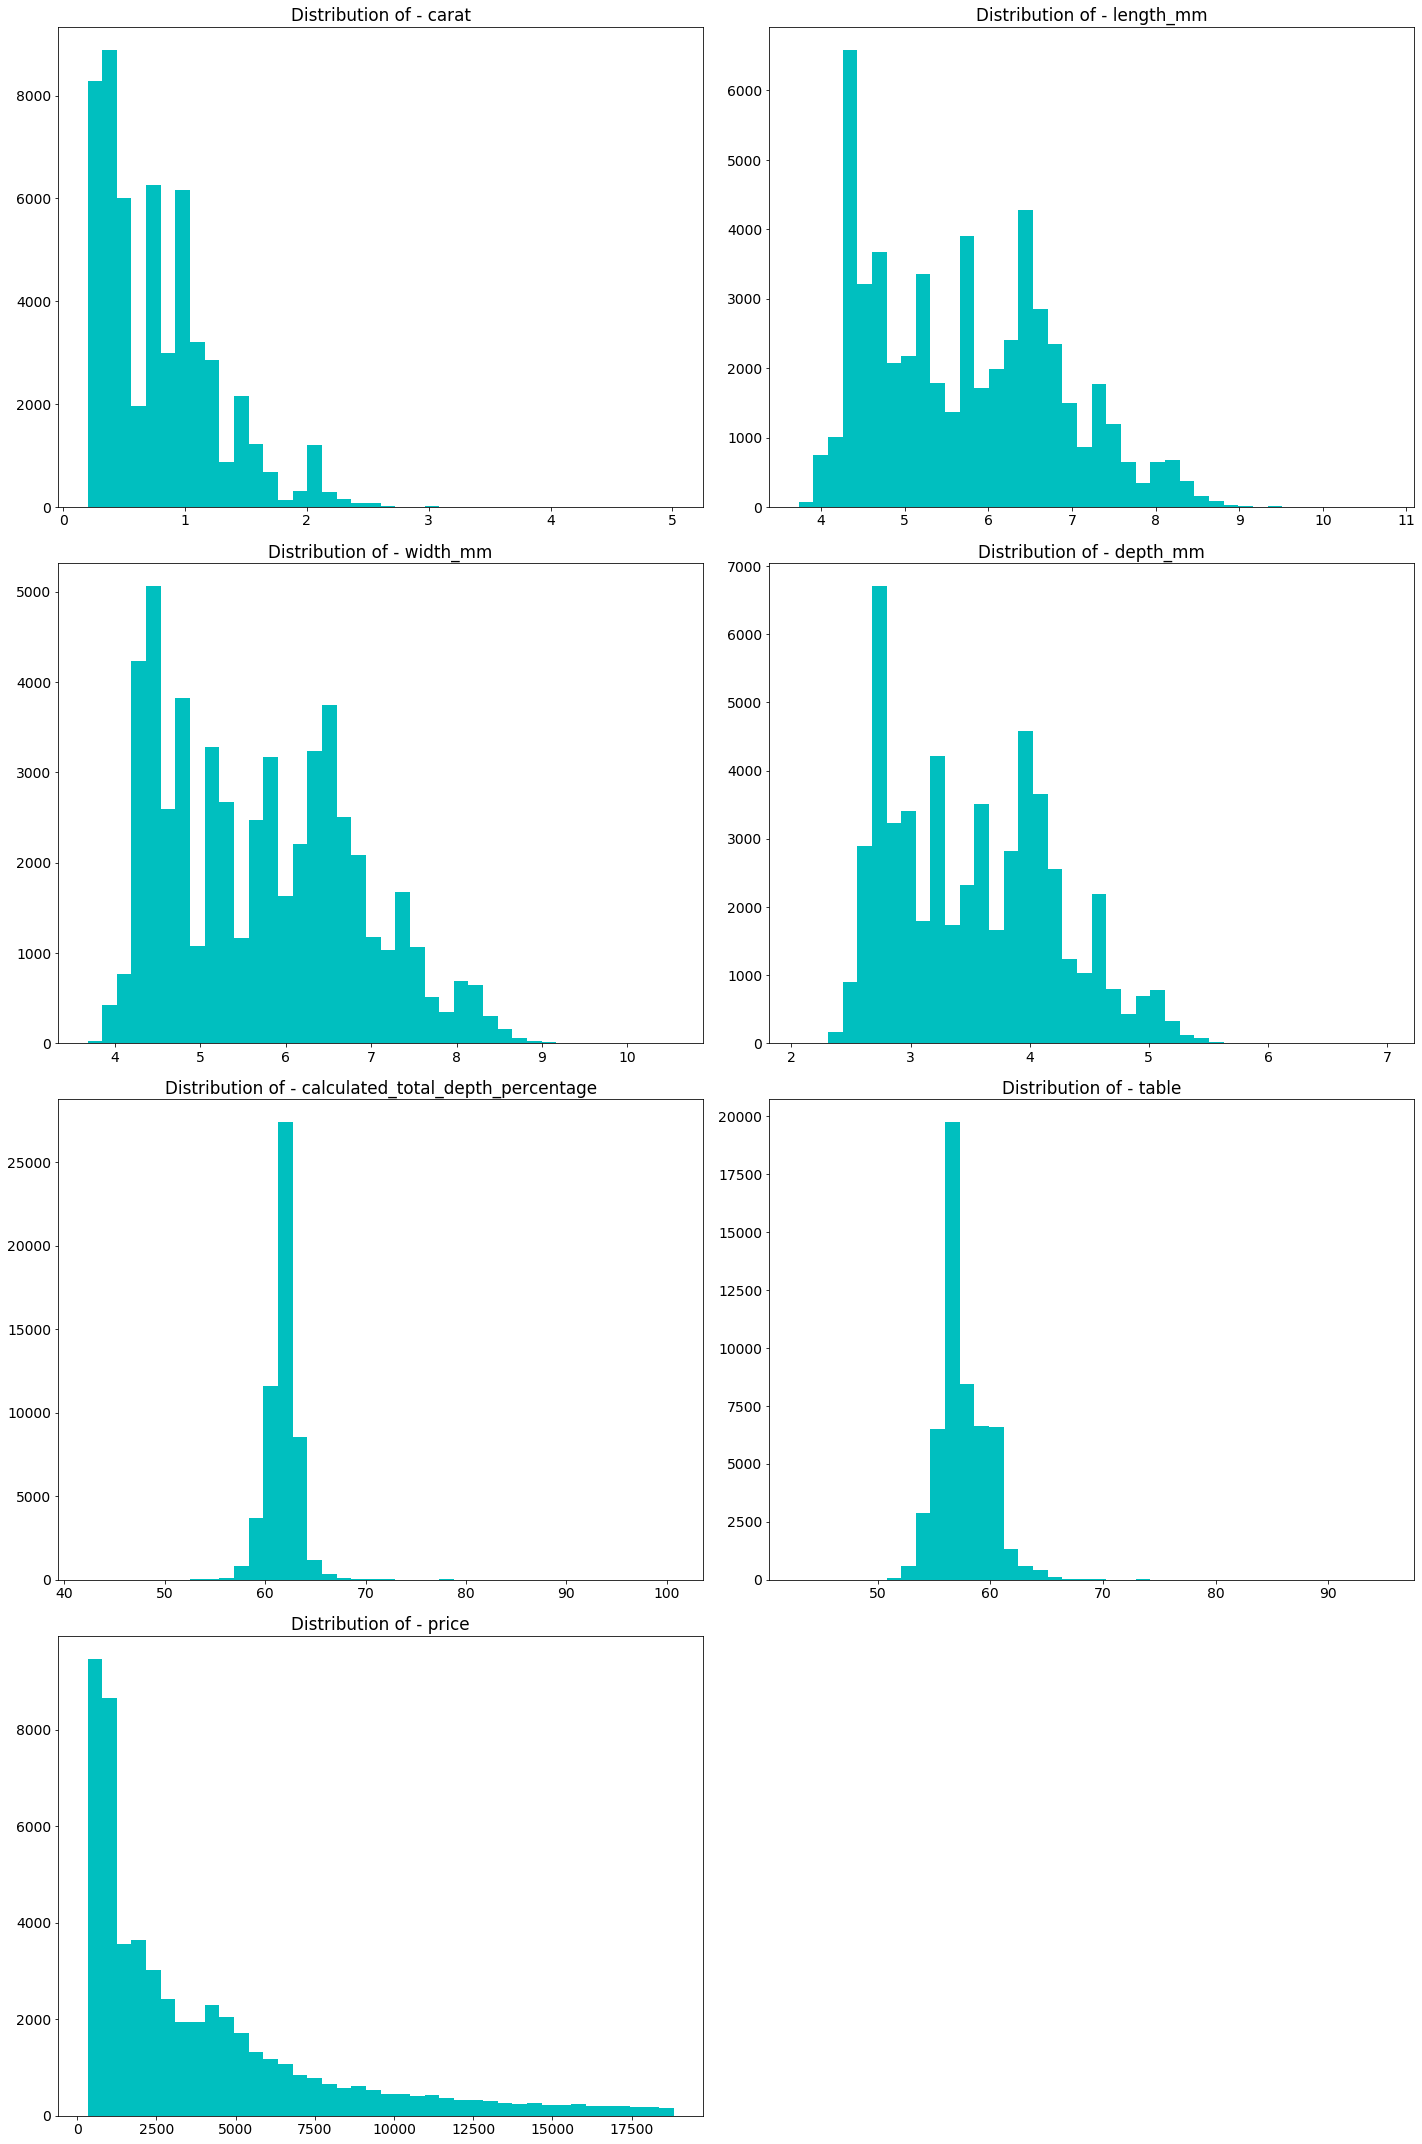

In [13]:
#set color palette for charts
sns.set_palette("muted")

#create a list of the numeric variables
diamonds_num = ['carat', 'length_mm', 'width_mm', 'depth_mm',
                'calculated_total_depth_percentage', 'table', 'price']

#set plot parameters
plt.rcParams.update({'font.size': 14,'figure.figsize':(20,30)}) 

#ignore warnings
np.warnings.filterwarnings('ignore')

#use an index to identify the spot of the subplot
j=1

#plot a histogram for each of our numeric variables
for k in diamonds_num :   
    plt.subplot(4,2,j) 
    plt.hist(diamonds_new[k], bins=40, color='c')
    plt.title('Distribution of - {}'.format(k))
    j=j+1 #add 1 to go to the next subplot space

plt.tight_layout()
#show results    
plt.show()

From the distributions we see that the **carat** variable is skewed to the right. We expected this since lower carat diamonds tend to be cheaper and more prevalent. 

We also see that **length_mm**, **width_mm** and **depth_mm** have a multi-modal distribution. They all have approximately the same range of 0-10. 

Both **calculated_total_depth_percentage** and **table** are approximately normally distributed. 

Similar to **carat**, **price** is skewed right with a maximum of over 17,000. Again, this is as expected since there are more diamonds with lower carats and cheaper ranges than there are diamonds with higher carats and higher prices.

Now we will plot the boxplot of our numerical variables against the target variable.

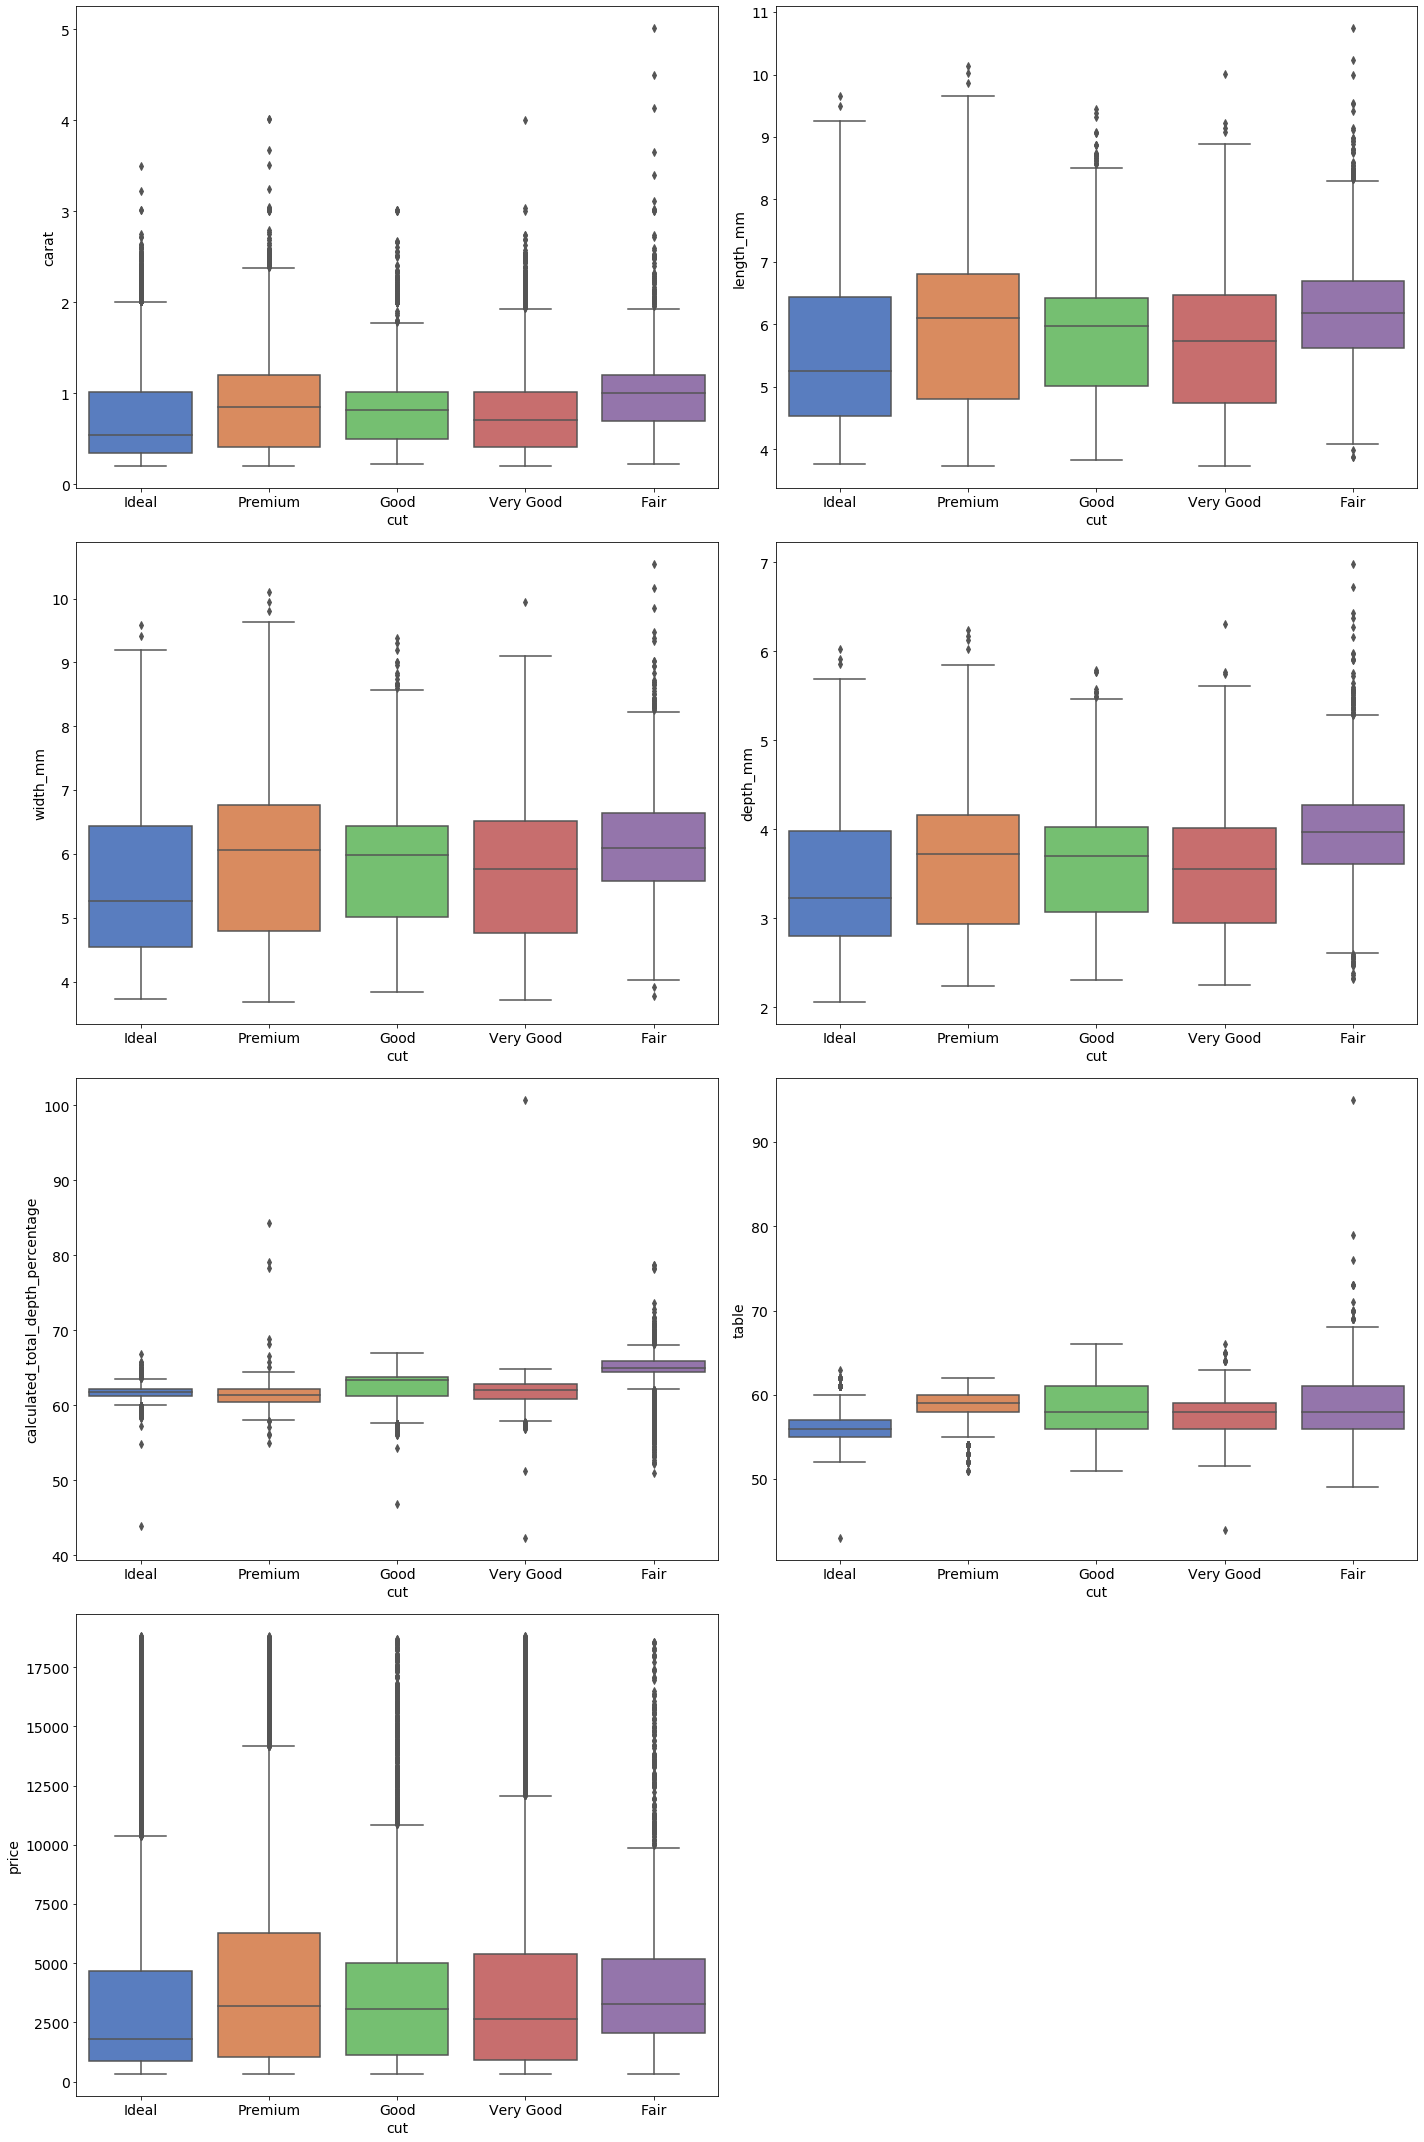

In [14]:
#use an index to identify the spot of the subplot
j=1
#plot boxplots of the distribution of each numerical variable against the target variable (cut)
for k in diamonds_num: 
    plt.subplot(4,2,j) 
    sns.boxplot(data=diamonds_new, x='cut', y=k)
    j=j+1

plt.tight_layout()
#show results    
plt.show()

The boxplots indicate that each of these variables may be a good predictor since there is a difference in where the median lies for different categories. For example, it seems that "Premium" cut diamonds have a higher median price than the other cuts of diamonds. This is slightly surprising since "Ideal" is the best cut. 

Next, we will plot a correlation matrix for our numerical variables.

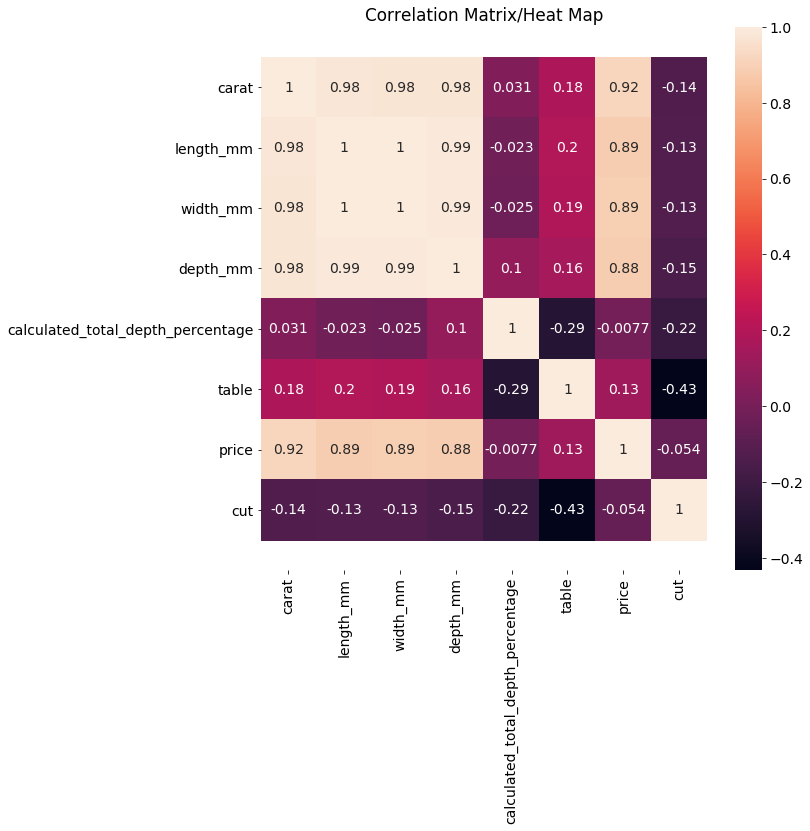

In [15]:
#get correlation matrix and plot it using seaborn

#set figure size
plt.figure(figsize=(10, 10)) 

#create a data frame with the numerical variables and the target variable
diamonds_num_df = diamonds_new[diamonds_num]
corr_df = diamonds_num_df.copy()
corr_df['cut'] = diamonds_new['cut']

#replace cut values to numeric values
corr_df.cut.replace({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}, inplace = True)
                                         
#get correlation matrix
corrMatrix = corr_df.corr() 

#graph correlation matrix
sns.heatmap(corrMatrix, annot=True) 
plt.title('Correlation Matrix/Heat Map') 

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

We note that carat and price have an extremely high correlation. In our data preparation section we will combine those into a calculated column called price_per_carat which will encapsulate all this information. Likewise, length, width, and depth all also have extremely high correlations with each other and with price. 

It also appears that table has the strongest correlation with our target variable cut, which may indicate that it is a good predictor. 

Next, we will plot the distribution of our categorical variables.

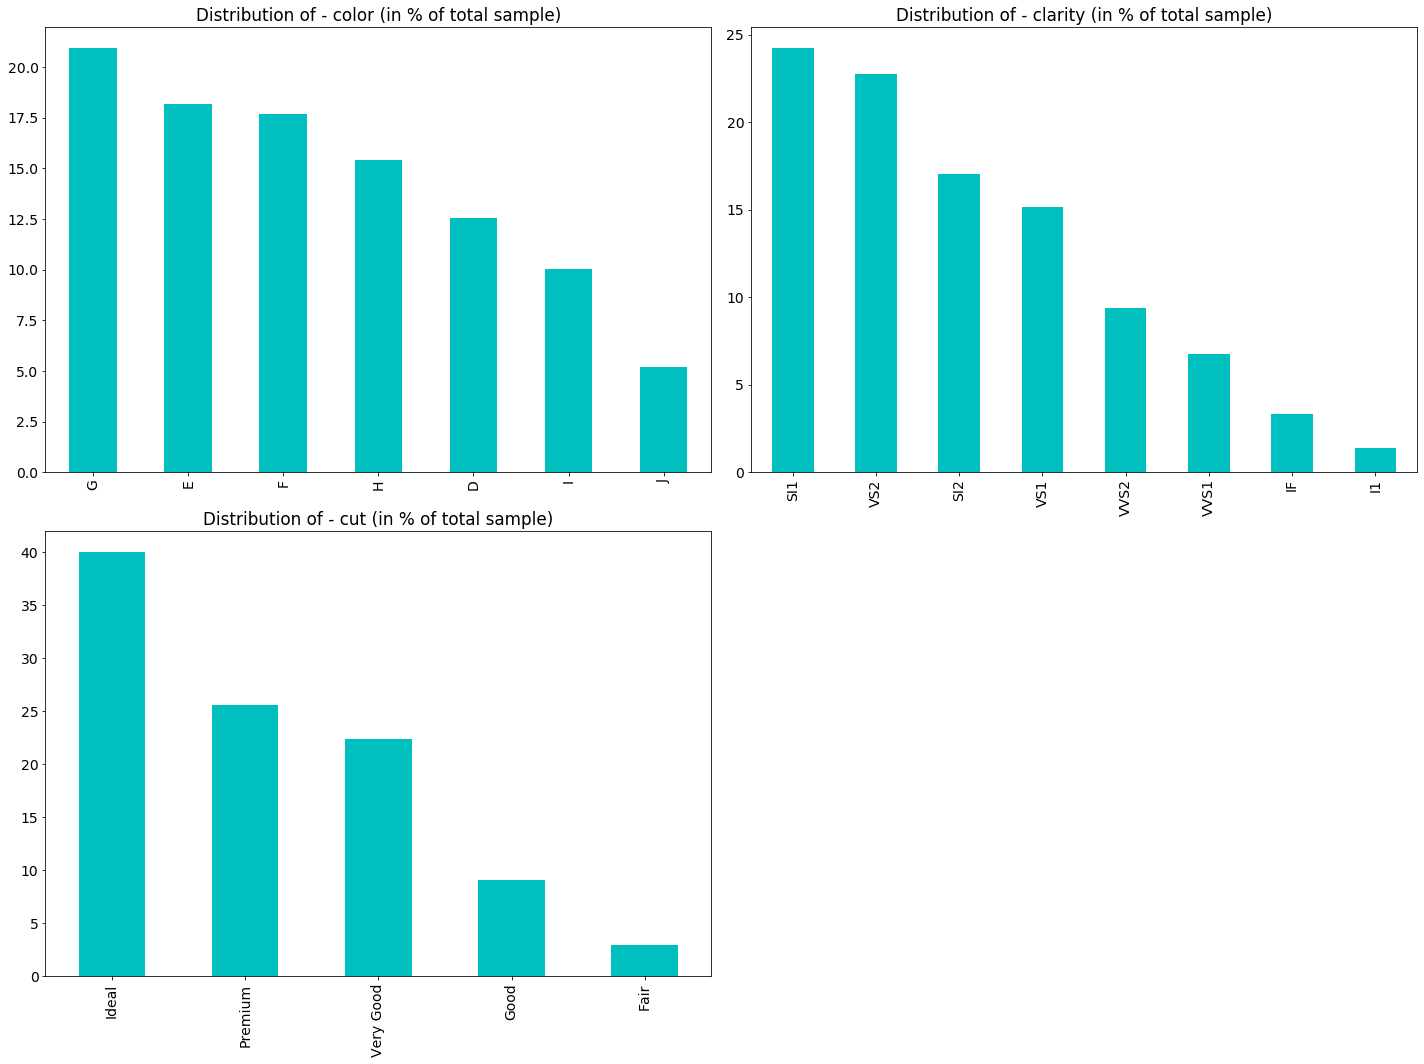

In [16]:
#create a list of the categorical variables including the target (cut)
diamonds_cat = ['color', 'clarity', 'cut']

#set plot parameters
plt.rcParams.update({'font.size': 14,'figure.figsize':(20,15)}) 

#use an index to identify the spot of the subplot
j=1
#plot a bar chart for each categorical variable, as % of total 
for k in diamonds_cat:
    plt.subplot(2,2,j) 
    ((diamonds_new[k].value_counts()/len(diamonds_new[k]))*100).plot(kind='bar', color = 'c');
    plt.title('Distribution of - {} (in % of total sample)'.format(k))
    j=j+1 #add 1 to go to the next subplot space

plt.tight_layout()
#show results    
plt.show()

From the above we see that the highest percentage of observations for color are for "G" which is close to the worst color of J. This makes sense as cheaper diamonds tend to have poorer color. 

For clarity, Sl1 had the highest frequency (which is also in keeping with the sample since it is a rather low level of clarity), and for cut, the most frequent category was an "Ideal" cut. 

Next we will plot the frequency of our target variable against the values of each categorical variable. 

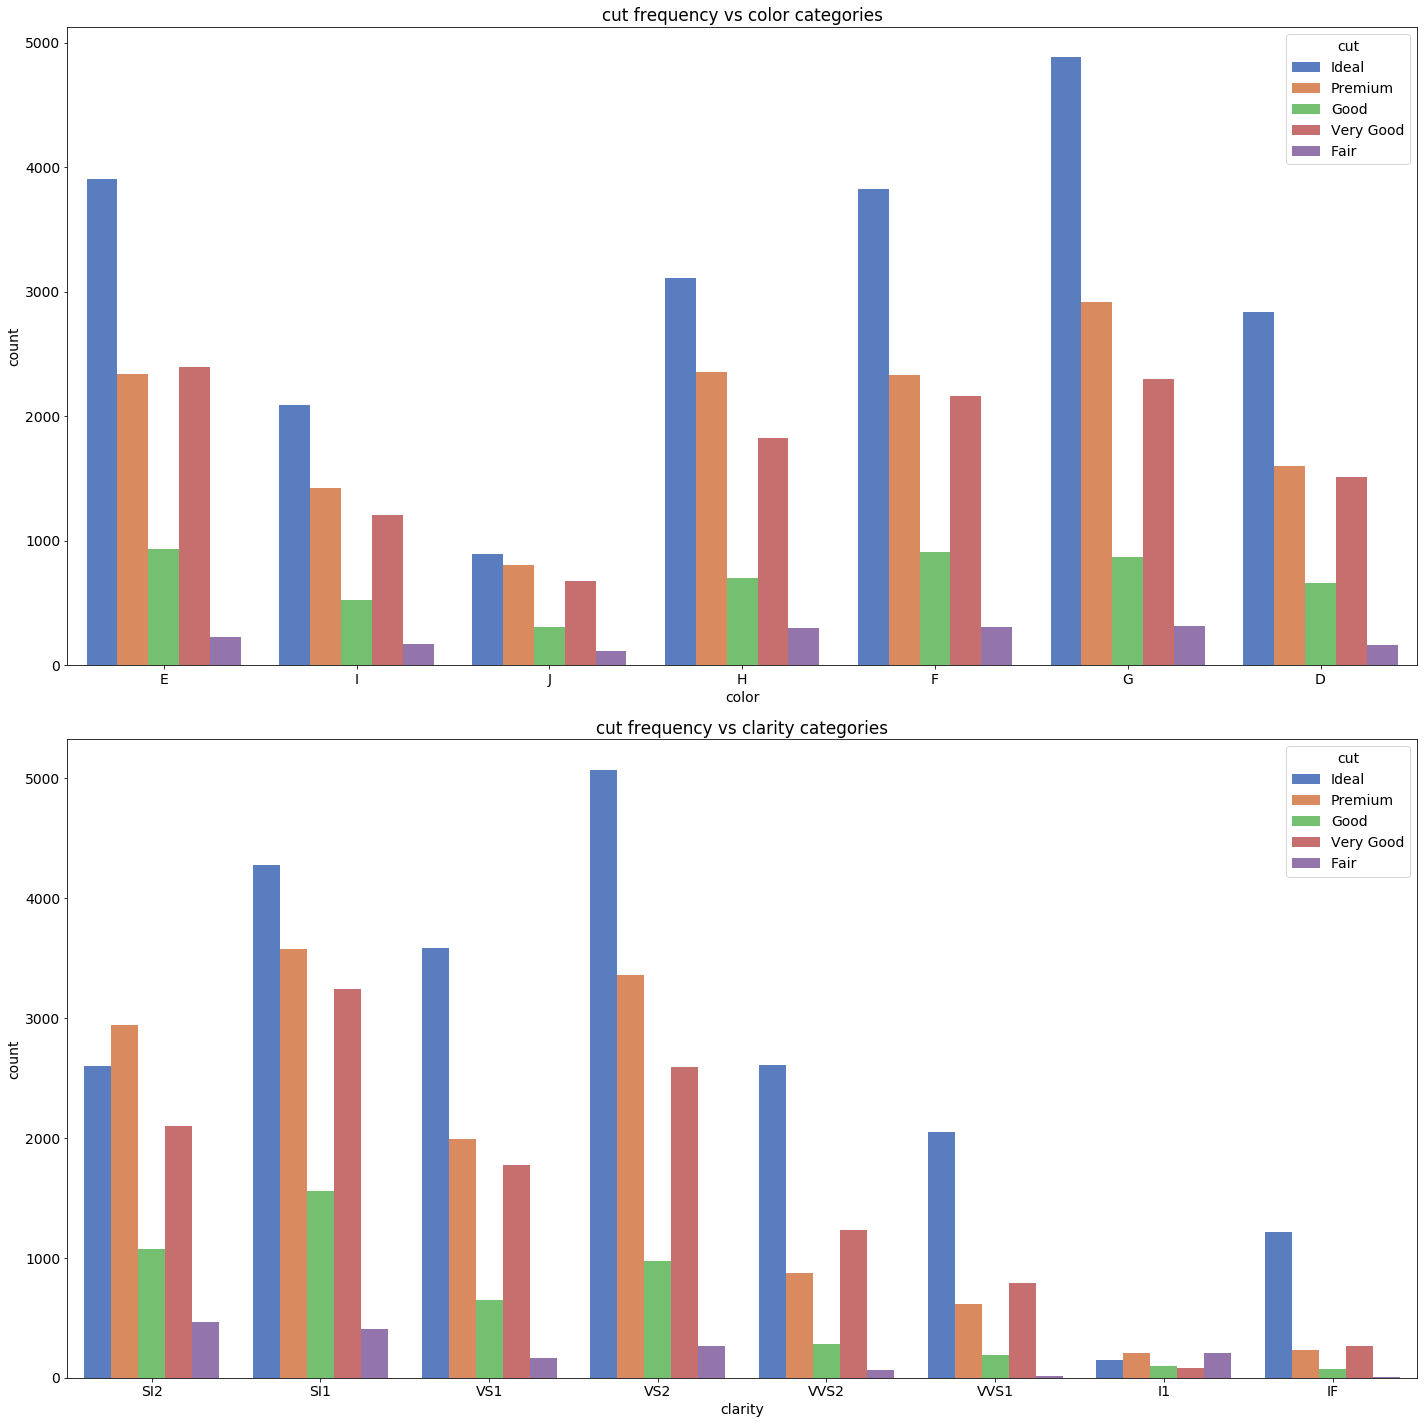

In [17]:
#set plot parameters
plt.rcParams.update({'font.size': 14,'figure.figsize':(20,20)}) 

#use an index to identify the spot of the subplot
j=1
#plot the frequency of our target variable (cut) vs the categories in each categorical variable 
for k in diamonds_cat[:-1]:
    plt.subplot(2,1,j) 
    sns.countplot(x=k, hue='cut' ,data=diamonds_new)
    plt.title('cut frequency vs %s categories' %k)
    j=j+1
plt.tight_layout()
#show results
plt.show()

Unfortunately we do not see any clear patterns that indicate any good predictors. 

We will now perform a chi-square test of independence on our categorical variables. 

In [18]:
#import module to perform chi-square
from scipy import stats

#create a data frame with the categorical variables
diamonds_cat_df = diamonds_new[diamonds_cat]

#create list to save chi-square test results
chi_sq=[]

#iterate over the categorical explanatory variables
for i in range(len(diamonds_cat[:-1])):
    chi_sq.append([stats.chi2_contingency(pd.crosstab(diamonds_cat_df.cut, diamonds_cat_df.iloc[:,i]))[0:2],diamonds_cat[i]])

#sort results
chi_sq.sort(reverse=True)

#put results in a dataframe
chi_sq_df = pd.DataFrame(chi_sq,columns=['Chi_Sq_Value , P_value','Variable'])
chi_sq_df

,"Chi_Sq_Value , P_value",Variable
0,"(4395.657862520958, 0.0)",clarity
1,"(309.5010904262559, 2.038381347303491e-51)",color


The results of our chi-square test indicate that both of our categorical variables may be good predictors since the associated p-values are less than .05. 

Next we will look at the information gain for classifying our target variable cut,  from each of our explanatory variables (the decrease in entropy of the target variable after a split on an explanatory variable).

In [19]:
#create copy of our data frame
diamonds_encoded = diamonds_new.copy()

#encode values in the categorical ordinal variables to numeric ordinal values  
diamonds_encoded.cut.replace({'Fair':0, 'Good':1, 'Very Good':2,
                              'Premium':3, 'Ideal':4}, inplace = True)
diamonds_encoded.clarity.replace({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3,
                                  'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7}, inplace = True)
diamonds_encoded.color.replace({'D':0, 'E':1, 'F':2, 'G':3, 'H':4,
                                'I':5, 'J':6}, inplace = True)

#import module to calculate information gain
from sklearn.feature_selection import mutual_info_classif

#make dict with information gain for each explanantory variable
info_gain = dict(zip(diamonds_encoded.iloc[:,:-1].columns.to_list(),
                     mutual_info_classif(diamonds_encoded.iloc[:,:-1], diamonds_encoded.cut, 
                                         discrete_features=True)
               ))

#create a data frame to display the results and sort them
info_gain_df = pd.DataFrame.from_dict(info_gain, orient='index', columns=['Mutual_Information'])
info_gain_df = info_gain_df.sort_values('Mutual_Information',ascending=False)
info_gain_df

,Mutual_Information
price,0.483594
calculated_total_depth_percentage,0.356254
table,0.328597
length_mm,0.121606
width_mm,0.104107
depth_mm,0.086662
carat,0.083444
clarity,0.032115
color,0.002888


The results above show us that the most information about the target variable 'cut' is gained from the variables 'price', 'calculated_total_depth_percentage', and 'table'.

Next we will look to see if the classes of our target variable are balanced.   

In [20]:
#print the percentage of observations in each class of our target variable (cut)
df_target = pd.DataFrame((diamonds_new["cut"].value_counts()/len(diamonds_new["cut"]))*100)
df_target.rename(columns = {'cut': 'percentage of diamonds'}, inplace = True)
df_target

,percentage of diamonds
Ideal,39.959936
Premium,25.557369
Very Good,22.406054
Good,9.092258
Fair,2.984383


We see from the above that our target variable 'cut' is imbalanced. Most of the diamonds in our sample have an 'Ideal' cut.

It will probably be beneficial to balance the class weight in our models. We will test this empirically.

We could achieve a model accuracy of nearly 40% by simply predicting a cut of 'Ideal'. That would be a very bad predictive model, and it is reflected by the very low accuracy. 

## Data Preparation 

In this section we will create a new feature to reflect the price per carat of a diamond. We will also create a new feature to reflect the symmetry of a diamond, since that is one of the most important factors in determining the quality of the cut of a diamond.

Then, we will standardize our data using MinMaxScaler from sklearn to have all the variables on the same scale, since that is required for a stochastic gradient descent classifier.

In [21]:
#create new feature - price_per_carat
diamonds_encoded['price_per_carat'] = round((diamonds_encoded['price']/diamonds_encoded['carat']),0).map(int)

#create new feature - symmetry
diamonds_encoded['symmetry'] = round((diamonds_encoded['length_mm']/diamonds_encoded['width_mm']),2)

#change order of the columns with the target variable last
diamonds_encoded = diamonds_encoded[['carat', 'length_mm', 'width_mm', 'depth_mm',
                                     'calculated_total_depth_percentage', 'symmetry', 'table', 'price',
                                     'price_per_carat', 'color', 'clarity', 'cut']]
#check results
diamonds_encoded.head()

,carat,length_mm,width_mm,depth_mm,calculated_total_depth_percentage,symmetry,table,price,price_per_carat,color,clarity,cut
0,0.23,3.95,3.98,2.43,61.3,0.99,55.0,326,1417,1,1,4
1,0.21,3.89,3.84,2.31,59.8,1.01,61.0,326,1552,1,2,3
2,0.23,4.05,4.07,2.31,56.9,1.00,65.0,327,1422,1,4,1
3,0.29,4.20,4.23,2.63,62.4,0.99,58.0,334,1152,5,3,3
4,0.31,4.34,4.35,2.75,63.3,1.00,58.0,335,1081,6,1,1


In [22]:
#import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

#create a new data frame 
diamonds_minmax_std = diamonds_encoded.copy()

#drop the target variable since we do not want to standardize it 
diamonds_minmax_std.drop(columns='cut',inplace=True)

#define scaler 
scaler = MinMaxScaler()
#fit and transform data including numerical and categorical ordinal variables
scaler.fit(diamonds_minmax_std)
diamonds_minmax_std = scaler.transform(diamonds_minmax_std)

#change data into data frame format
diamonds_minmax_std = pd.DataFrame(diamonds_minmax_std,
                                   columns = diamonds_encoded.columns.to_list()[:-1])
                        
#readd the target variable
diamonds_minmax_std['cut'] = diamonds_encoded['cut'].copy()

#show results
diamonds_minmax_std.head()

,carat,length_mm,width_mm,depth_mm,calculated_total_depth_percentage,symmetry,table,price,price_per_carat,color,clarity,cut
0,0.006237,0.031384,0.043732,0.075203,0.325342,0.275862,0.230769,0.000000,0.021814,0.166667,0.142857,4
1,0.002079,0.022825,0.023324,0.050813,0.299658,0.298851,0.346154,0.000000,0.029861,0.166667,0.285714,3
2,0.006237,0.045649,0.056851,0.050813,0.250000,0.287356,0.423077,0.000054,0.022112,0.166667,0.571429,1
3,0.018711,0.067047,0.080175,0.115854,0.344178,0.275862,0.288462,0.000433,0.006020,0.833333,0.428571,3
4,0.022869,0.087019,0.097668,0.140244,0.359589,0.287356,0.288462,0.000487,0.001788,1.000000,0.142857,1


## Prepped Data Review 

In this section we will review the correlation matrix and information gain with our prepared data in order to see if there are any good predictors for our models.

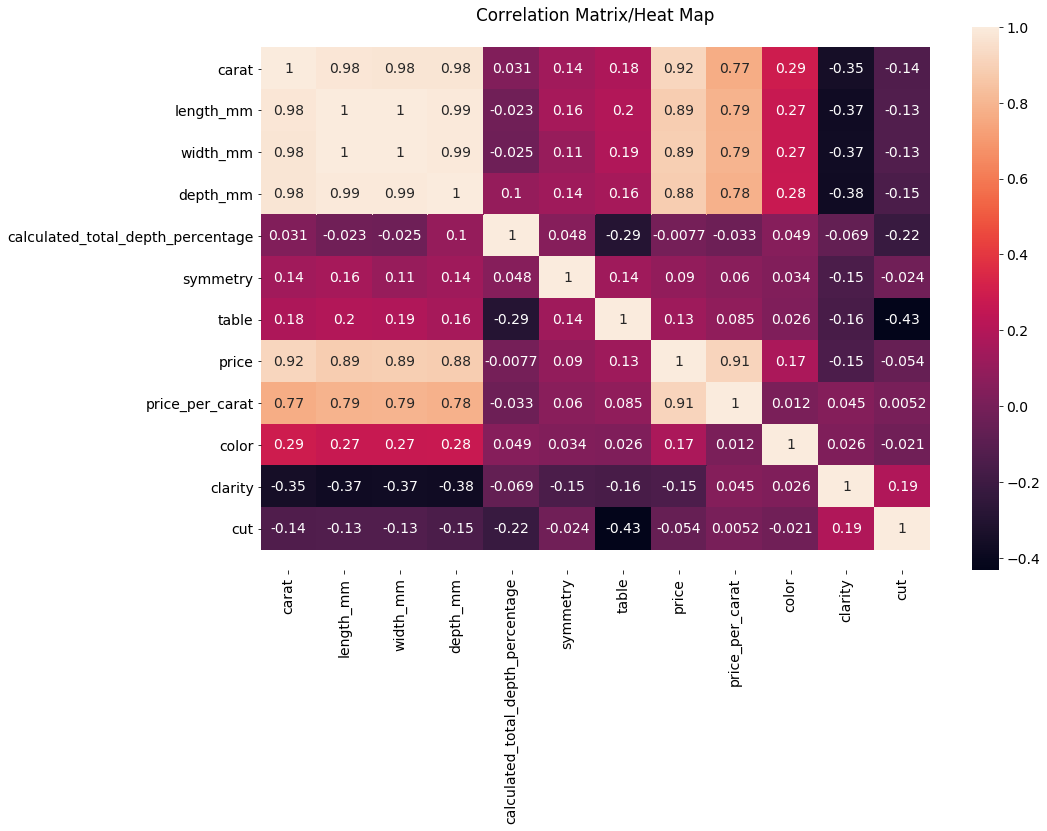

In [23]:
#get correlation matrix and plot it using seaborn

#set figure size
plt.figure(figsize=(15,10)) 

#get correlation matrix
corrMatrix2 = diamonds_minmax_std.corr() 

#graph correlation matrix including numerical and categorical ordinal variables
sns.heatmap(corrMatrix2, annot=True) 
plt.title('Correlation Matrix/Heat Map') 

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

We see that the variables that have the strongest correlation with the target variable are table and calculated_total_depth_percentage. These may be good predictors to use in our models.

Additionally, we note that price_per_carat has a strong correlation with price (this is obvious since price_per_carat is derived in part from price), carat, length_mm, width_mm, and depth_mm. Since these variables are so correlated, it seems that by using price_per_carat we could reduce the dimensionality of our model. 

Next, we will again check for the information gained from each variable.

In [24]:
#make dict with information gain for each explanatory variable
info_gain2 = dict(zip(diamonds_minmax_std.iloc[:,:-1].columns.to_list(),
                      mutual_info_classif(diamonds_minmax_std.iloc[:,:-1], diamonds_minmax_std.cut, 
                                          discrete_features=True)
                     ))

#create a data frame to display the results and sort them
info_gain_df2 = pd.DataFrame.from_dict(info_gain2, orient='index', columns=['Mutual_Information'])
info_gain_df2 = info_gain_df2.sort_values('Mutual_Information',ascending=False)
info_gain_df2

,Mutual_Information
price,0.483594
price_per_carat,0.395109
calculated_total_depth_percentage,0.356254
table,0.328597
symmetry,0.125592
length_mm,0.121606
width_mm,0.104107
depth_mm,0.086662
carat,0.083444
clarity,0.032115


From above we see that price had the highest information gain value, followed by price_per_carat, calculated_total_depth_percentage, table, and symmetry. This indicates that these may be good predictors.

We will now select which variables we want to include in our models and build the models.

## Classifier Modeling 

**Feature Selection**

Based on the findings in our data prep review, we will select the following four variables as predictors in our models:
- price_per_carat
- calculated_total_depth_percentage
- table
- symmetry

While price had a higher information gain value, the information from price is contained within the price_per_carat variable. 

Additionally, since the information on length, width, and depth is encapsulated within the calculated_total_depth_percentage and symmetry variables, we decided to use our calculated column and new feature to reduce dimensionality. 

<br>

**Train / Test Split**  

We will now split the data we will be using in our models into training and testing subsets, and then proceed to build our models, starting with a Decision Tree model.

In [25]:
#load train_test_split from scikit learn
from sklearn.model_selection import train_test_split 

x = diamonds_minmax_std[['price_per_carat', 'calculated_total_depth_percentage', 'table', 'symmetry']]
y = diamonds_minmax_std['cut']

#create train and test subsets, use 80% of the data to train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0,stratify=y)

#check shape of trainis as expected
x_train.shape

(43131, 4)

### Decision Tree Model

We will now construct our first model, a Decision Tree Model using the four variables mentioned above. 

To help decide which hyperparameters to use in our model we referenced [this article](https://towardsdatascience.com/decision-tree-build-prune-and-visualize-it-using-python-12ceee9af752). We will first look to see whether entropy or gini will yield the best results, and also look to see what max depth gives us the maximum cross-validated accuracy.

We tested the model empirically, and we found that the model performs better with the class_weight set to 'balanced'. 

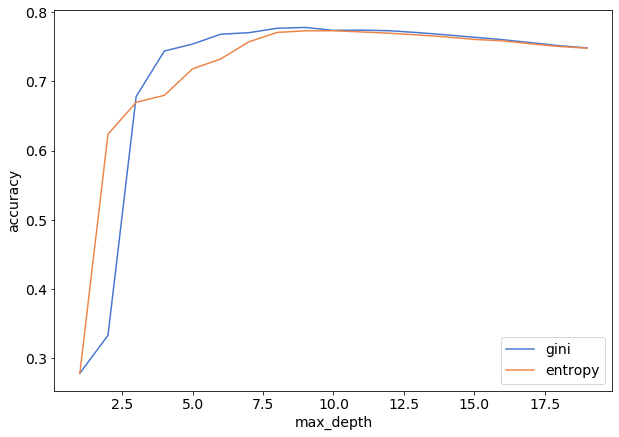

In [26]:
#import DecisionTreeClassifier and accuracy score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#create empty lists to store the values from our for loop
max_depth = []
acc_gini = []
acc_entropy = []

#for each iteration, train the tree model using gini and then entropy with depth i
#and gather cross-validated accuracy scores for each max depth and criterion
for i in range(1,20):
    dtree = DecisionTreeClassifier(criterion='gini', max_depth=i, class_weight="balanced")
    dtree.fit(x_train, y_train)
    acc_gini.append(round(np.mean(cross_val_score(dtree, x_train, y_train, cv=5, scoring='accuracy')),4))

    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i, class_weight="balanced")
    dtree.fit(x_train, y_train)
    acc_entropy.append(round(np.mean(cross_val_score(dtree, x_train, y_train, cv=5, scoring='accuracy')),4))

    max_depth.append(i)
    
#create a dataframe with the values from our lists above so that we can visualize our results
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
                  'acc_entropy':pd.Series(acc_entropy),
                  'max_depth':pd.Series(max_depth)})

#set figure size
plt.figure(figsize=(10,7)) 
#visualize changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show();

Next, we will save the maximum depth and criterion that correspond with the maximum cross-validated accuracy.

In [27]:
#find chosen max_depth and chosen criterion
depth_entropy = d[d['acc_entropy'] == d['acc_entropy'].max()].max_depth.iloc[0]
depth_gini = d[d['acc_gini'] == d['acc_gini'].max()].max_depth.iloc[0]
if d['acc_entropy'].max() > d['acc_gini'].max():
    chosen_criterion = 'entropy'
    chosen_depth = depth_entropy
else:
    chosen_criterion = 'gini'
    chosen_depth = depth_gini

#print
print("chosen max_depth is: {} , chosen criterion is: {}"
      .format(chosen_depth,chosen_criterion))

#print rows with max acc for each criterion
e_tree = d[d['acc_entropy'] == d['acc_entropy'].max()]    
g_tree = d[d['acc_gini'] == d['acc_gini'].max()]
eg_df_tree = pd.concat([e_tree,g_tree])
eg_df_tree

chosen max_depth is: 9 , chosen criterion is: gini


,acc_gini,acc_entropy,max_depth
9,0.7739,0.7733,10
8,0.7781,0.7732,9


Now we will fit the model with the values we found above.

In [28]:
#fit model
tree_model = DecisionTreeClassifier(criterion=chosen_criterion, max_depth=chosen_depth)
tree_model.fit(x_train, y_train)

#generate prediction based on the train set
tree_pred = tree_model.predict(x_train)

Next, we will evaluate the performance of the Decision Tree model. 

We will start by generating a confusion matrix. 
We are following the steps described in this [article](https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a) to plot a normalized version of the confusion matrix. We adopted the code from this [GitHub](https://github.com/javaidnabi31/Multi-class-with-imbalanced-dataset-classification/blob/master/20-news-group-classification.ipynb) page.

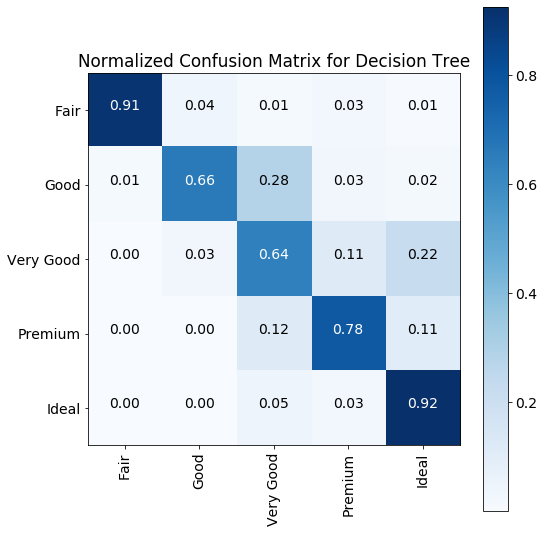

In [29]:
#import necessary modules for calculating and plotting a normalized confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

#make a list of possible classes in the target variable in the order they were encoded.
classes = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

#save the confusion matrix
conf_mat = confusion_matrix(y_train,tree_pred)

#transform the count values into proportions
cm = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

#set the plot
fig = plt.figure()
fig.set_size_inches(8, 8)

#plot the matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix for Decision Tree')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)

#set the colors inside the blocks
fmt = '.2f'
thresh = cm.max() / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
#set the layout
plt.tight_layout()

From the above we see that the model predicted the 'Fair' and 'Ideal' cut categories almost perfectly and performed not as well in predicting the other categories.

We will now calculate metrics on the train set.

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#use the metrics from sklearn for a multi-class target 
#evaluate prediction on train set 
accuracy_tree = accuracy_score(y_train, tree_pred)
precision_tree = precision_score(y_train, tree_pred, average='micro')
recall_tree = recall_score(y_train, tree_pred, average='micro')
f1_tree = f1_score(y_train, tree_pred, average='micro')

#print results
print("Evaluation Metrics on the train set for Decision Tree Model")
print("The Accuracy score on the train set is: ", round(accuracy_tree,4))
print("The Precision score on the train set is: ", round(precision_tree,4))
print("The Recall score on the train set is:: ", round(recall_tree,4))
print("The F1 score on the train set is: ", round(f1_tree,4))

Evaluation Metrics on the train set for Decision Tree Model
The Accuracy score on the train set is:  0.7979
The Precision score on the train set is:  0.7979
The Recall score on the train set is::  0.7979
The F1 score on the train set is:  0.7979


We will now cross-validate the model, and calculate model evaluation metrics. 

We will use the cross_val_score function with the scoring method adjusted for a classification model of a multi-class target.
We used the following [article](https://sebastianraschka.com/faq/docs/multiclass-metric.html) as a reference, as well as [this](https://scikit-learn.org/stable/modules/cross_validation.html) scikit-learn documentation page, which includes an example of cross-validation for a SVM model with a multi-class target.
All the scoring methods are listed on this [page](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter). We will use 5 folds to do the cross validation since our training set has over 43,000 observations, this will allow a sufficient sample size for training our model.

In [31]:
#import cross_val_score
from sklearn.model_selection import cross_val_score

#use k-fold cross validation, since our sample size is sufficiently large, a 5-fold validation is appropriate
cv_res_accuracy_tree = cross_val_score(tree_model, x_train, y_train, cv=5,scoring='accuracy')
cv_res_precision_tree = cross_val_score(tree_model, x_train, y_train, cv=5,scoring='precision_micro')
cv_res_recall_tree = cross_val_score(tree_model, x_train, y_train, cv=5,scoring='recall_micro')
cv_res_f1_tree = cross_val_score(tree_model, x_train, y_train, cv=5,scoring='f1_micro')

#print results
print("Cross validated metrics for Decision Tree Model")
print("The average Accuracy score for the 5 folds was: ", round(np.mean(cv_res_accuracy_tree),4))
print("The average Precision score for the 5 folds was: ", round(np.mean(cv_res_precision_tree),4))
print("The average Recall score for the 5 folds was: ", round(np.mean(cv_res_recall_tree),4))
print("The average F1 score for the 5 folds was: ", round(np.mean(cv_res_f1_tree),4))

Cross validated metrics for Decision Tree Model
The average Accuracy score for the 5 folds was:  0.7854
The average Precision score for the 5 folds was:  0.7854
The average Recall score for the 5 folds was:  0.7853
The average F1 score for the 5 folds was:  0.7852


We see that there are similar scores for accuracy, precision, recall, and F1. They are slightly lower than the metrics calculated on the entire training set as we were expecting.

### Random Forest Model

We will now construct our second model, a Random Forest Model using the four variables mentioned above. 

To help decide which hyperparameters to use in our model we will again look to see whether entropy or gini will yield the best results, and also look to see what max depth gives us the maximum cross-validated accuracy.

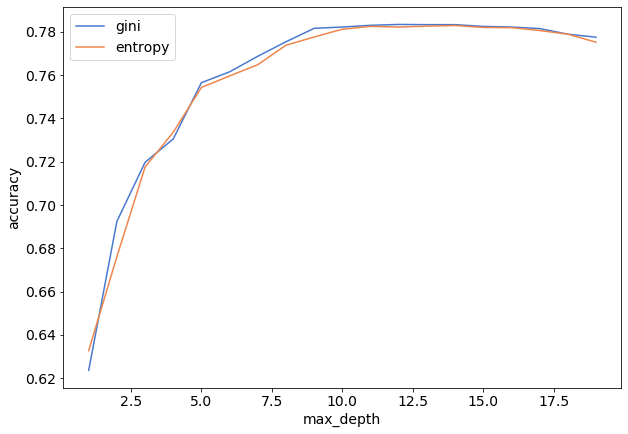

In [32]:
#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#create empty lists to store the values from our for loop
max_depth_rfc = []
acc_gini_rfc = []
acc_entropy_rfc = []

#for each iteration, train the random forest model using gini and then entropy with depth i
#and gather cross-validated accuracy scores for each max depth and criterion
for i in range(1,20):
    rfc = RandomForestClassifier(criterion='gini', max_depth=i, class_weight="balanced")
    rfc.fit(x_train, y_train)
    acc_gini_rfc.append(round(np.mean(cross_val_score(rfc, x_train, y_train, cv=5, scoring='accuracy')),4))

    rfc = RandomForestClassifier(criterion='entropy', max_depth=i, class_weight="balanced")
    rfc.fit(x_train, y_train)
    acc_entropy_rfc.append(round(np.mean(cross_val_score(rfc, x_train, y_train, cv=5, scoring='accuracy')),4))

    max_depth_rfc.append(i)
    
#create a dataframe with the values from our lists above so that we can visualize our results
df_rfc = pd.DataFrame({'acc_gini_rfc':pd.Series(acc_gini_rfc), 
                       'acc_entropy_rfc':pd.Series(acc_entropy_rfc),
                       'max_depth_rfc':pd.Series(max_depth_rfc)})

#set figure size
plt.figure(figsize=(10,7)) 
#visualize changes in parameters
plt.plot('max_depth_rfc','acc_gini_rfc', data=df_rfc, label='gini')
plt.plot('max_depth_rfc','acc_entropy_rfc', data=df_rfc, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show();

In [33]:
#find chosen max_depth and chosen criterion
depth_entropy_rfc = df_rfc[df_rfc['acc_entropy_rfc'] == df_rfc['acc_entropy_rfc'].max()].max_depth_rfc.iloc[0]
depth_gini_rfc = df_rfc[df_rfc['acc_gini_rfc'] == df_rfc['acc_gini_rfc'].max()].max_depth_rfc.iloc[0]

if df_rfc['acc_entropy_rfc'].max() > df_rfc['acc_gini_rfc'].max():
    chosen_criterion_rfc = 'entropy'
    chosen_depth_rfc = depth_entropy_rfc
else:
    chosen_criterion_rfc = 'gini'
    chosen_depth_rfc = depth_gini_rfc

#print chosen parameters
print("chosen max_depth is: {} , chosen criterion is: {}"
      .format(chosen_depth_rfc,chosen_criterion_rfc))

#print rows with max acc for each criterion    
e_rfc = df_rfc[df_rfc['acc_entropy_rfc'] == df_rfc['acc_entropy_rfc'].max()]    
g_rfc = df_rfc[df_rfc['acc_gini_rfc'] == df_rfc['acc_gini_rfc'].max()]
eg_df_rfc = pd.concat([e_rfc,g_rfc])
eg_df_rfc

chosen max_depth is: 12 , chosen criterion is: gini


,acc_gini_rfc,acc_entropy_rfc,max_depth_rfc
13,0.7833,0.7829,14
11,0.7834,0.7822,12


In [34]:
#set and fit the model using the same set of variables
random_forest_model = RandomForestClassifier(criterion=chosen_criterion_rfc, max_depth=chosen_depth_rfc)
random_forest_model.fit(x_train, y_train)

#generate prediction based on the train set
random_forest_pred = random_forest_model.predict(x_train)

Next, we will evaluate the performance of the Random Forest model.  
We will start by generating a normalized confusion matrix.

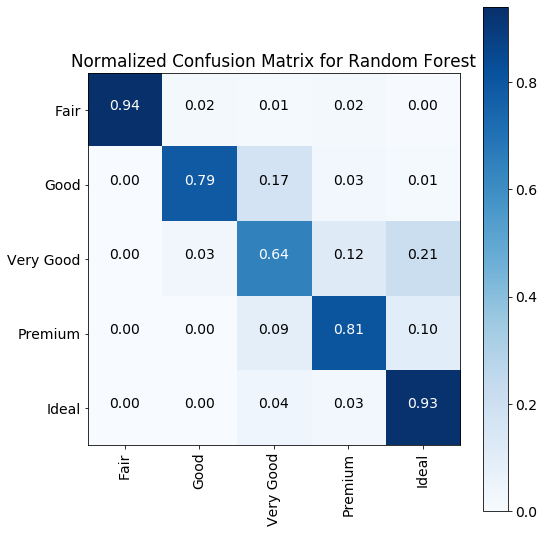

In [35]:
#save the confusion matrix
conf_mat2 = confusion_matrix(y_train,random_forest_pred)

#transform the count values into proportions
cm2 = conf_mat2.astype('float') / conf_mat2.sum(axis=1)[:, np.newaxis]

#set the plot
fig = plt.figure()
fig.set_size_inches(8, 8)

#plot the matrix
plt.imshow(cm2, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix for Random Forest')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)

#set the colors inside the blocks
fmt = '.2f'
thresh = cm2.max() / 2.

for i, j in itertools.product(range(cm2.shape[0]), range(cm2.shape[1])):
        plt.text(j, i, format(cm2[i, j], fmt),horizontalalignment="center",
                 color="white" if cm2[i, j] > thresh else "black")
        
#set the layout
plt.tight_layout()

In [36]:
#use the metrics from sklearn for a multi-class target 
#evaluate prediction on train set 
accuracy_rf = accuracy_score(y_train, random_forest_pred)
precision_rf = precision_score(y_train, random_forest_pred, average='micro')
recall_rf = recall_score(y_train, random_forest_pred, average='micro')
f1_rf = f1_score(y_train, random_forest_pred, average='micro')

#print results
print("Evaluation Metrics on the train set for Random Forest Model")
print("The balanced Accuracy score for the Random Forest is: ", round(accuracy_rf,4))
print("The Precision score for the Random Forest is: ", round(precision_rf,4))
print("The Recall score for the Random Forest is: ", round(recall_rf,4) )
print("The F1 score for the Random Forest is: ", round(f1_rf,4))

Evaluation Metrics on the train set for Random Forest Model
The balanced Accuracy score for the Random Forest is:  0.8223
The Precision score for the Random Forest is:  0.8223
The Recall score for the Random Forest is:  0.8223
The F1 score for the Random Forest is:  0.8223


Looking at the metrics of the model trained on the entire training set we see, unsurprisingly, that the results of the random forest model are better than the results of our decision tree. Unlike the decision tree, the confusion matrix for our random forest model shows that this model did a better job at predicting the classes, excluding the class 'Very Good'. 

We will now cross-validate the model, and calculate model evaluation metrics.

In [37]:
#use k-fold cross validation, since our sample size is sufficiently large, a 5-fold validation is appropriate
cv_res_accuracy_rf = cross_val_score(random_forest_model, x_train, y_train, cv=5, scoring='accuracy')
cv_res_precision_rf = cross_val_score(random_forest_model, x_train, y_train, cv=5, scoring='precision_micro')
cv_res_recall_rf = cross_val_score(random_forest_model, x_train, y_train, cv=5, scoring='recall_micro')
cv_res_f1_rf = cross_val_score(random_forest_model, x_train, y_train, cv=5, scoring='f1_micro')

#print results
print("Cross validated metrics for Random Forest Model")
print("The average Accuracy score for the 5 folds was: ", round(np.mean(cv_res_accuracy_rf),4))
print("The average Precision score for the 5 folds was: ", round(np.mean(cv_res_precision_rf),4))
print("The average Recall score for the 5 folds was: ", round(np.mean(cv_res_recall_rf),4))
print("The average F1 score for the 5 folds was: ", round(np.mean(cv_res_f1_rf),4))

Cross validated metrics for Random Forest Model
The average Accuracy score for the 5 folds was:  0.7908
The average Precision score for the 5 folds was:  0.7908
The average Recall score for the 5 folds was:  0.7908
The average F1 score for the 5 folds was:  0.7909


We can see that the metrics are only slightly better than those of the Decision Tree Model.

### Stochastic Gradient Descent Classifier

We will now construct our third model, a Stochastic Gradient Descent Classifier using the four variables mentioned above. 

To help decide which hyperparameters to use in our model we referenced the [SGDClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier) and [this article](https://towardsdatascience.com/hyperparameter-tuning-c5619e7e6624) on grid search. Grid search is a traditional way to perform hyperparameter optimization. It works by searching exhaustively through a specified subset of hyperparameters.

We will search for the best cross-validated accuracy using GridSearchCV and changing the following parameters:
- **loss**: Loss is the loss function to be used. We will test appropriate loss functions for a multi-class target classification model
- **learning_rate**: The learning rate schedule. We will test all the possible values
- **alpha**: A constant that multiplies the regularization term. The higher the value, the stronger the regularization. Also used to compute the learning rate when set to 'optimal'. We will test several values 
- **eta0**:The initial learning rate for the learning rate schedule excluding 'optimal'. We will test several values.

In [38]:
#import SGDClassifier and GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

#create lists of different parameter values that will be tested 
loss = ['hinge', 'modified_huber', 'squared_hinge']
alpha = [0.0001, 0.001, 0.01, 0.1, 1]
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive']
eta0 = [0.00001, 0.001, 0.2, 0.5, 1]

#create dict to input into GridSearchCV
param_distributions = dict(loss=loss,
                           alpha=alpha,
                           learning_rate=learning_rate,
                           eta0=eta0)

#optimize parameter values using GridSearchCV
sgd_grid = GridSearchCV(estimator=SGDClassifier(random_state=0, class_weight="balanced"),
                        param_grid=param_distributions,
                        cv=5, scoring='accuracy',
                        verbose=1, n_jobs=-1)

#fit the model using the result
sgd_grid.fit(x_train, y_train)

#print the best cross-validated accuracy using 5 folds
print('Best Score: ', sgd_grid.best_score_)
#print the parameters of the best cross-validated accuracy
print('Best Params: ', sgd_grid.best_params_)
#print the best estimator 
sgd_model = sgd_grid.best_estimator_
sgd_model

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 19.4min finished


Best Score:  0.6360389285699024
Best Params:  {'alpha': 0.0001, 'eta0': 1, 'learning_rate': 'adaptive', 'loss': 'squared_hinge'}


SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=1, fit_intercept=True,
              l1_ratio=0.15, learning_rate='adaptive', loss='squared_hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
#now fit the best model found using the GridSearchCV
sgd_model.fit(x_train, y_train)

#generate prediction based on the train set
sgd_pred = sgd_model.predict(x_train)

Next, we will evaluate the performance of the Stochastic Gradient Descent Classifier.  
We will start by generating a normalized confusion matrix, then calculate performance metrics of the model when applied to the training set and when cross-validated.

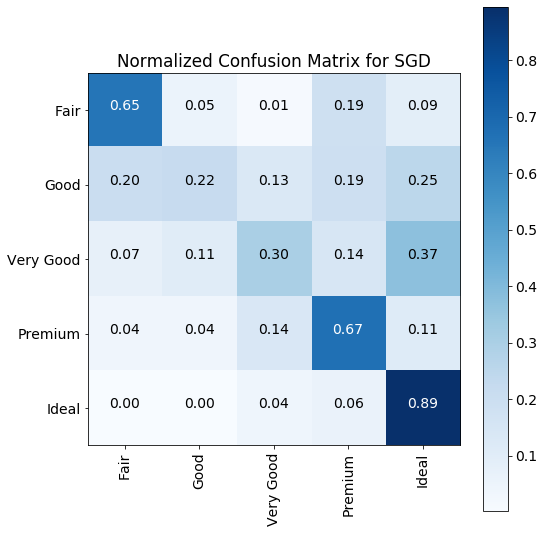

In [40]:
#save the confusion matrix
conf_mat3 = confusion_matrix(y_train,sgd_pred)

#transform the count values into proportions
cm3 = conf_mat3.astype('float') / conf_mat3.sum(axis=1)[:, np.newaxis]

#set the plot
fig = plt.figure()
fig.set_size_inches(8, 8)

#plot the matrix
plt.imshow(cm3, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix for SGD')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)

#set the colors inside the blocks
fmt = '.2f'
thresh = cm3.max() / 2.

for i, j in itertools.product(range(cm3.shape[0]), range(cm3.shape[1])):
        plt.text(j, i, format(cm3[i, j], fmt),horizontalalignment="center",
                 color="white" if cm3[i, j] > thresh else "black")
        
#set the layout
plt.tight_layout()

In [41]:
#use the metrics from sklearn for a multi-class target 
#evaluate prediction on train set 
accuracy_sgd = accuracy_score(y_train, sgd_pred)
precision_sgd = precision_score(y_train, sgd_pred, average='micro')
recall_sgd = recall_score(y_train, sgd_pred, average='micro')
f1_sgd = f1_score(y_train, sgd_pred, average='micro')

#print results
print("Evaluation Metrics on the train set for Stochastic Gradient Descent Classifier")
print("The Accuracy score for the Stochastic Gradient Descent is: ", round(accuracy_sgd,4))
print("The Precision score for the Stochastic Gradient Descent is: ", round(precision_sgd,4))
print("The Recall score for the Stochastic Gradient Descent is: ", round(recall_sgd,4) )
print("The F1 score for the Stochastic Gradient Descent is: ", round(f1_sgd,4))

Evaluation Metrics on the train set for Stochastic Gradient Descent Classifier
The Accuracy score for the Stochastic Gradient Descent is:  0.6367
The Precision score for the Stochastic Gradient Descent is:  0.6367
The Recall score for the Stochastic Gradient Descent is:  0.6367
The F1 score for the Stochastic Gradient Descent is:  0.6367


In [42]:
#use k-fold cross validation, since our sample size is sufficiently large, a 5-fold validation is appropriate
cv_res_accuracy_sgd = cross_val_score(sgd_model, x_train, y_train, cv=5, scoring='accuracy')
cv_res_precision_sgd = cross_val_score(sgd_model, x_train, y_train, cv=5, scoring='precision_micro')
cv_res_recall_sgd = cross_val_score(sgd_model, x_train, y_train, cv=5, scoring='recall_micro')
cv_res_f1_sgd = cross_val_score(sgd_model, x_train, y_train, cv=5, scoring='f1_micro')

#print results
print("Cross validated metrics for Random Stochastic Gradient Descent Classifier")
print("The average Accuracy score for the 5 folds was: ", round(np.mean(cv_res_accuracy_sgd),4))
print("The average Precision score for the 5 folds was: ", round(np.mean(cv_res_precision_sgd),4))
print("The average Recall score for the 5 folds was: ", round(np.mean(cv_res_recall_sgd),4))
print("The average F1 score for the 5 folds was: ", round(np.mean(cv_res_f1_sgd),4))

Cross validated metrics for Random Stochastic Gradient Descent Classifier
The average Accuracy score for the 5 folds was:  0.636
The average Precision score for the 5 folds was:  0.636
The average Recall score for the 5 folds was:  0.636
The average F1 score for the 5 folds was:  0.636


Of the models created so far this model has the worst performance. 

### Gradient Boosting Classifier

We will now construct our fourth model, a Gradient Boosting Classifier using the four variables mentioned above. 

To help decide which hyperparameters to use in our model we referenced the [GradientBoostingClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html?highlight=gradientboosting#sklearn.ensemble.GradientBoostingClassifier), [this article](https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/) on hyperparameter tuning and [this article](https://towardsdatascience.com/hyperparameter-tuning-c5619e7e6624) on random search. Random search differs from grid search mainly in that it searches the specified subset of hyperparameters randomly instead of exhaustively, which decreases processing time.

We will search for the best cross-validated accuracy using RandomizedSearchCV and changing the following parameters:
- **learning_rate:** There are no optimum values for learning rate as low values always work better, given that we train on sufficient number of trees, but a high number of trees for a particular learning rate can lead to overfitting. Reducing the learning rate and increasing the number of trees, increases the computational expense. The default is 0.1, we will test a range from 0.05 to 1. 
  
- **n_estimators:** A higher number of trees makes the model robust. However, too high a number can cause overfitting. 
A value which allows the system to work fairly fast is preferred since it will be used for testing various scenarios and determining other tree parameters. The default is 100, we will test a range from 20 to 100. 

- **min_samples_split:** Defines the minimum number of observations which are required in a node to be considered for splitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree. However, too high values can lead to under-fitting. The default is 2, we will test a range from 200 to 1000 which is appropriate considering the size of our dataset. 

For the **max_depth** parameter we will use the max_depth we found to be best when building our Decision Tree Model.  
For the **max_features** parameter we will use the maximum number of features we have (4). 

Gradient Boosting Classifier doesn't have the class_weight hyperparameter, the built-in approach for combating class imbalance deals with it by constructing successive training sets based on incorrectly classified examples.

In [43]:
#import GradientBoostingClassifier and RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

#create lists of different parameter values that will be tested 
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
n_estimators = range(20,101,20)
min_samples_split= range(200,1001,200)

#create dict to input into RandomizedSearchCV
parameter_gbc = dict(learning_rate=lr_list,
                     n_estimators=n_estimators,
                     min_samples_split=min_samples_split)

#optimize parameter values using GridSearchCV
random_gbc = RandomizedSearchCV(estimator=GradientBoostingClassifier(max_features=4,
                                                                      max_depth=chosen_depth,
                                                                      random_state=0),
                                 param_distributions=parameter_gbc, 
                                 scoring='accuracy', cv=5,
                                 verbose=1, n_jobs=-1)
#fit the model using the result
random_gbc.fit(x_train, y_train)

#print the best cross-validated accuracy using 5 folds
print('Best Score: ', random_gbc.best_score_)
#print the parameters of the best cross-validated accuracy
print('Best Params: ', random_gbc.best_params_)
#print the best estimator 
gbc_model = random_gbc.best_estimator_
gbc_model

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.9min finished


Best Score:  0.7964340409335554
Best Params:  {'n_estimators': 80, 'min_samples_split': 400, 'learning_rate': 0.05}


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=9,
                           max_features=4, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=400,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Next, we will evaluate the performance of the Gradient Boosting Classifier.
We will start by generating a normalized confusion matrix, then calculate performance metrics of the model when applied to the training set and when cross-validated.

In [44]:
#now fit the best model found using the RandomizedSearchCV
gbc_model.fit(x_train, y_train)

#generate prediction based on the train set
gbc_pred = gbc_model.predict(x_train)

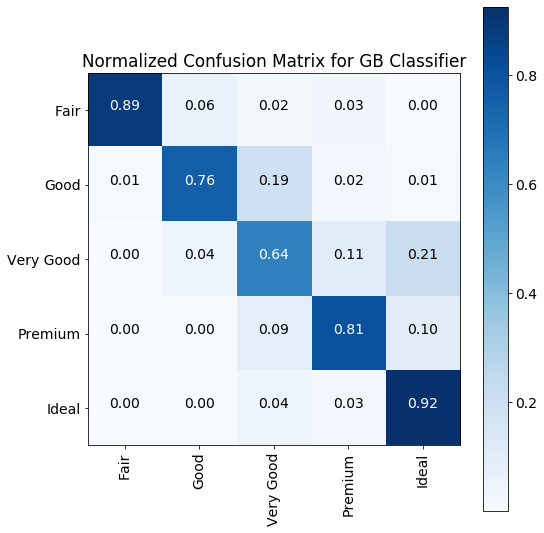

In [45]:
#save the confusion matrix
conf_mat4 = confusion_matrix(y_train, gbc_pred)

#transform the count values into proportions
cm4 = conf_mat4.astype('float') / conf_mat4.sum(axis=1)[:, np.newaxis]

#set the plot
fig = plt.figure()
fig.set_size_inches(8, 8)

#plot the matrix
plt.imshow(cm4, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix for GB Classifier')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)

#set the colors inside the blocks
fmt = '.2f'
thresh = cm4.max() / 2.

for i, j in itertools.product(range(cm4.shape[0]), range(cm4.shape[1])):
        plt.text(j, i, format(cm4[i, j], fmt),horizontalalignment="center",
                 color="white" if cm4[i, j] > thresh else "black")
        
#set the layout
plt.tight_layout()

In [46]:
#use the metrics from sklearn for a multi-class target 
#evaluate prediction on train set
accuracy_gbc = accuracy_score(y_train, gbc_pred)
precision_gbc = precision_score(y_train, gbc_pred, average='micro')
recall_gbc = recall_score(y_train, gbc_pred, average='micro')
f1_gbc = f1_score(y_train, gbc_pred, average='micro')

#print results
print("Evaluation Metrics on the train set for Gradient Boosting Classifier")
print("The Accuracy score for the Gradient Boosting Classifier is: ", round(accuracy_gbc,4))
print("The Precision score for the Gradient Boosting Classifier is: ", round(precision_gbc,4))
print("The Recall score for the Gradient Boosting Classifier is: ", round(recall_gbc,4) )
print("The F1 score for the Gradient Boosting Classifier is: ", round(f1_gbc,4))

Evaluation Metrics on the train set for Gradient Boosting Classifier
The Accuracy score for the Gradient Boosting Classifier is:  0.8141
The Precision score for the Gradient Boosting Classifier is:  0.8141
The Recall score for the Gradient Boosting Classifier is:  0.8141
The F1 score for the Gradient Boosting Classifier is:  0.8141


In [47]:
#use k-fold cross validation, since our sample size is sufficiently large, a 5-fold validation is appropriate
cv_res_accuracy_gbc = cross_val_score(gbc_model, x_train, y_train, cv=5, scoring='accuracy')
cv_res_precision_gbc = cross_val_score(gbc_model, x_train, y_train, cv=5, scoring='precision_micro')
cv_res_recall_gbc = cross_val_score(gbc_model, x_train, y_train, cv=5, scoring='recall_micro')
cv_res_f1_gbc = cross_val_score(gbc_model, x_train, y_train, cv=5, scoring='f1_micro')

#print results
print("Cross validated metrics for Gradient Boosting Classifier")
print("The average Accuracy score for the 5 folds was: ", round(np.mean(cv_res_accuracy_gbc),4))
print("The average Precision score for the 5 folds was: ", round(np.mean(cv_res_precision_gbc),4))
print("The average Recall score for the 5 folds was: ", round(np.mean(cv_res_recall_gbc),4))
print("The average F1 score for the 5 folds was: ", round(np.mean(cv_res_f1_gbc),4))

Cross validated metrics for Gradient Boosting Classifier
The average Accuracy score for the 5 folds was:  0.7964
The average Precision score for the 5 folds was:  0.7964
The average Recall score for the 5 folds was:  0.7964
The average F1 score for the 5 folds was:  0.7964


The results of the Gradient Boosting Classifier are better than those of the previous models, and in particular much better than the results of the Stochastic Gradient Descent model.  

### XG Boost Classifier

We will now construct our fifth model, an XG Boost Classifier using the four variables mentioned above. 

To help decide which hyperparameters to use in our model we referenced the [xgboost parameter documentation](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters), [this article](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/) on hyperparameter tuning and [this article](https://towardsdatascience.com/hyperparameter-tuning-c5619e7e6624) on random search.

We will search for the best cross-validated accuracy using RandomizedSearchCV and changing the following parameters:

- **eta**: The initial learning rate
- **alpha**:The regularization term on weights. Increasing this value will make model more conservative


For the **min_child_weight**, **n_estimators** and **gamma** parameters we will use the default values since we are already controlling ovefitting by setting the max_depth to the depth we found to be best when building our Decision Tree Model. We are also comfortable using the default setting for **subsample** which is not to sub sample.  
Additionally, we set the **objective** and **num_class** parameters with values appropriate for a multi-class target. 

In [48]:
#import XGBClassifier
import xgboost 
from xgboost import XGBClassifier

#create dict to input into RandomizedSearchCV
parameter_xgb = {
                 'eta':[0.01, 0.05, 0.1, 0.2, 0.5, 1],
                 'alpha':[0.0001, 0.001, 0.01, 0.1, 1]
                }   

#optimize parameter values using RandomizedSearchCV
random_xgb = RandomizedSearchCV(estimator=XGBClassifier(random_state=0,
                                                        booster='gbtree',
                                                        objective='multi:softmax',
                                                        num_class=5,
                                                        max_depth=chosen_depth
                                                       ),
                                param_distributions=parameter_xgb,
                                verbose=1, n_jobs=-1,
                                cv=5, scoring='accuracy')

#fit the model using the result
random_xgb.fit(x_train, y_train)

#print the best cross-validated accuracy using 5 folds
print('Best Score: ', random_xgb.best_score_)
#print the parameters of the best cross-validated accuracy
print('Best Params: ', random_xgb.best_params_)
#print the best estimator 
xgb_model = random_xgb.best_estimator_
xgb_model

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.0min finished


Best Score:  0.7951124899689587
Best Params:  {'eta': 0.2, 'alpha': 0.01}


XGBClassifier(alpha=0.01, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.2, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.200000003, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_class=5, num_parallel_tree=1,
              objective='multi:softprob', random_state=0,
              reg_alpha=0.00999999978, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Next, we will evaluate the performance of the XG Boost Classifier. We will start by generating a normalized confusion matrix, then calculate performance metrics of the model when applied to the training set and when cross-validated.

In [49]:
#now fit the best model found using the RandomizedSearchCV
xgb_model.fit(x_train, y_train)

#generate prediction based on the train set
xgb_pred = xgb_model.predict(x_train)

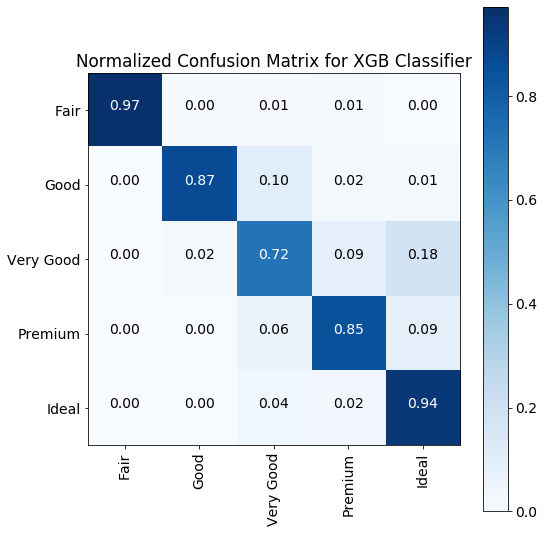

In [50]:
#save the confusion matrix
conf_mat5 = confusion_matrix(y_train, xgb_pred)

#transform the count values into proportions
cm5 = conf_mat5.astype('float') / conf_mat5.sum(axis=1)[:, np.newaxis]

#set the plot
fig = plt.figure()
fig.set_size_inches(8, 8)

#plot the matrix
plt.imshow(cm5, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix for XGB Classifier')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)

#set the colors inside the blocks
fmt = '.2f'
thresh = cm5.max() / 2.

for i, j in itertools.product(range(cm5.shape[0]), range(cm5.shape[1])):
        plt.text(j, i, format(cm5[i, j], fmt),horizontalalignment="center",
                 color="white" if cm5[i, j] > thresh else "black")
        
#set the layout
plt.tight_layout()

In [51]:
#use the metrics from sklearn for a multi-class target
accuracy_xgb = accuracy_score(y_train, xgb_pred)
precision_xgb = precision_score(y_train, xgb_pred, average='micro')
recall_xgb = recall_score(y_train, xgb_pred, average='micro')
f1_xgb = f1_score(y_train, xgb_pred, average='micro')

#print results
print("Evaluation Metrics on the train set for XG Boost Classifier")
print("The Accuracy score for the XG Boost Classifier is: ", round(accuracy_xgb,4))
print("The Precision score for the XG Boost Classifier is: ", round(precision_xgb,4))
print("The Recall score for the XG Boost Classifier is: ", round(recall_xgb,4) )
print("The F1 score for the XG Boost Classifier is: ", round(f1_xgb,4))

Evaluation Metrics on the train set for XG Boost Classifier
The Accuracy score for the XG Boost Classifier is:  0.8601
The Precision score for the XG Boost Classifier is:  0.8601
The Recall score for the XG Boost Classifier is:  0.8601
The F1 score for the XG Boost Classifier is:  0.8601


In [52]:
#use k-fold cross validation, since our sample size is sufficiently large, a 5-fold validation is appropriate
cv_res_accuracy_xgb = cross_val_score(xgb_model, x_train, y_train, cv=5, scoring='accuracy')
cv_res_precision_xgb = cross_val_score(xgb_model, x_train, y_train, cv=5, scoring='precision_micro')
cv_res_recall_xgb = cross_val_score(xgb_model, x_train, y_train, cv=5, scoring='recall_micro')
cv_res_f1_xgb = cross_val_score(xgb_model, x_train, y_train, cv=5, scoring='f1_micro')

#print results
print("Cross validated metrics for XG Boost Classifier")
print("The average Accuracy score for the 5 folds was: ", round(np.mean(cv_res_accuracy_xgb),4))
print("The average Precision score for the 5 folds was: ", round(np.mean(cv_res_precision_xgb),4))
print("The average Recall score for the 5 folds was: ", round(np.mean(cv_res_recall_xgb),4))
print("The average F1 score for the 5 folds was: ", round(np.mean(cv_res_f1_xgb),4))

Cross validated metrics for XG Boost Classifier
The average Accuracy score for the 5 folds was:  0.7951
The average Precision score for the 5 folds was:  0.7951
The average Recall score for the 5 folds was:  0.7951
The average F1 score for the 5 folds was:  0.7951


The results above shows that the XG Boost Classifier slightly under-performs when compared to the Gradient Boosting Classifier.

## Select Models 

We will now compare the performance of all the models that we generated above.  
We will then apply our preferred model to the testing set, and evaluate the performance.

In [53]:
#summary of comparison between models
summary_df = pd.DataFrame(np.array([['4',
                                     round(np.mean(cv_res_accuracy_tree),4),
                                     round(np.mean(cv_res_precision_tree),4),
                                     round(np.mean(cv_res_recall_tree),4),                                     
                                     round(np.mean(cv_res_f1_tree),4)
                                     ],
                                    ['4',
                                     round(np.mean(cv_res_accuracy_rf),4),
                                     round(np.mean(cv_res_precision_rf),4),
                                     round(np.mean(cv_res_recall_rf),4),                                     
                                     round(np.mean(cv_res_f1_rf),4)
                                     ],
                                    ['4',
                                     round(np.mean(cv_res_accuracy_sgd),4),
                                     round(np.mean(cv_res_precision_sgd),4),
                                     round(np.mean(cv_res_recall_sgd),4),                                     
                                     round(np.mean(cv_res_f1_sgd),4)
                                     ],
                                    ['4',
                                     round(np.mean(cv_res_accuracy_gbc),4),
                                     round(np.mean(cv_res_precision_gbc),4),
                                     round(np.mean(cv_res_recall_gbc),4),                                     
                                     round(np.mean(cv_res_f1_gbc),4)
                                     ],
                                    ['4',
                                     round(np.mean(cv_res_accuracy_xgb),4),
                                     round(np.mean(cv_res_precision_xgb),4),
                                     round(np.mean(cv_res_recall_xgb),4),                                     
                                     round(np.mean(cv_res_f1_xgb),4)
                                     ],
                                   ]),
                          columns=['Variables in Model','Accuracy',
                                   'Precision', 'Recall', 'F1'],
                          index=['Decision Tree', 'Random Forest',
                                 'Stochastic Gradient Descent Classifier',
                                 'Gradient Boosting Classifier', 'XG Boost Classifier'])

#print results
summary_df

,Variables in Model,Balanced Accuracy,Precision,Recall,F1
Decision Tree,4,0.7854,0.7854,0.7853,0.7852
Random Forest,4,0.7908,0.7908,0.7908,0.7909
Stochastic Gradient Descent Classifier,4,0.636,0.636,0.636,0.636
Gradient Boosting Classifier,4,0.7964,0.7964,0.7964,0.7964
XG Boost Classifier,4,0.7951,0.7951,0.7951,0.7951


Since each of our models has the same number of variables, and the differences in the metrics are marginal we would prefer the Decision Tree model which is the easiest to understand and interpret, and also the least computationally expensive.

We note that the Stochastic Gradient Descent Classifier had the worst performance out of the models. This was an expected result since it only uses a single random observation during each iteration while model training. 

Somewhat surprisingly, the Gradient Boosting Classifier had the best performance. However, the Gradient Boosting Classifier and the XG Boost Classifier had very similar results. This was expected since they are using the same max_depth that we set after finding the optimal max depth for the Decision Tree. Although they have the highest scores on each of the metrics, they are very computationally expensive and the increase in performance isn't substantial enough to warrant this extra expense.

Next we will apply our preferred model to the test subset, generate a confusion matrix, and calculate performance metrics.

In [54]:
#generate prediction based on the test set
test_pred = tree_model.predict(x_test)

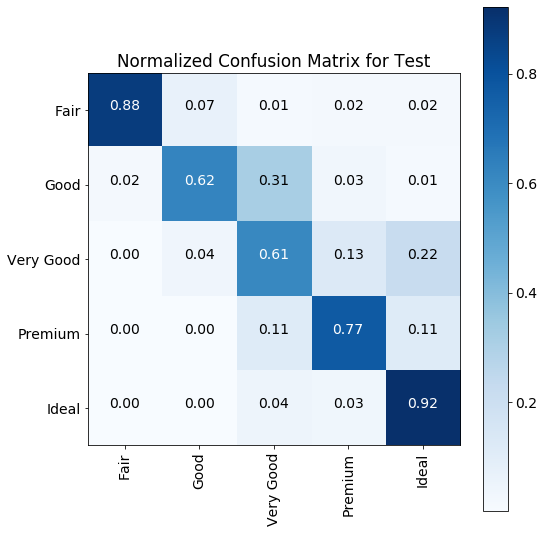

In [55]:
#save the confusion matrix
conf_mat6 = confusion_matrix(y_test, test_pred)

#transform the count values into proportions
cm6 = conf_mat6.astype('float') / conf_mat6.sum(axis=1)[:, np.newaxis]

#set the plot
fig = plt.figure()
fig.set_size_inches(8, 8)

#plot the matrix
plt.imshow(cm6, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix for Test')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)

#set the colors inside the blocks
fmt = '.2f'
thresh = cm6.max() / 2.

for i, j in itertools.product(range(cm6.shape[0]), range(cm6.shape[1])):
        plt.text(j, i, format(cm6[i, j], fmt),horizontalalignment="center",
                 color="white" if cm6[i, j] > thresh else "black")
        
#set the layout
plt.tight_layout()

In [56]:
#use the metrics from sklearn for a multi-class target
accuracy_test = accuracy_score(y_test, test_pred)
precision_test = precision_score(y_test, test_pred, average='micro')
recall_test = recall_score(y_test, test_pred, average='micro')
f1_test = f1_score(y_test, test_pred, average='micro')

#print results
print("Evaluation Metrics on the Test")
print("The Accuracy score for the Test is: ", round(accuracy_test,4))
print("The Precision score for the Test is: ", round(precision_test,4))
print("The Recall score for the Test is: ", round(recall_test,4) )
print("The F1 score for the Test is: ", round(f1_test,4))

Evaluation Metrics on the Test
The Accuracy score for the Test is:  0.7854
The Precision score for the Test is:  0.7854
The Recall score for the Test is:  0.7854
The F1 score for the Test is:  0.7854


In [57]:
#summary of comparison between models and Test set
summary_df_test = pd.DataFrame(np.array([['4',
                                     round(np.mean(cv_res_accuracy_tree),4),
                                     round(np.mean(cv_res_precision_tree),4),
                                     round(np.mean(cv_res_recall_tree),4),                                     
                                     round(np.mean(cv_res_f1_tree),4)
                                     ],
                                    ['4',
                                     round(np.mean(cv_res_accuracy_rf),4),
                                     round(np.mean(cv_res_precision_rf),4),
                                     round(np.mean(cv_res_recall_rf),4),                                     
                                     round(np.mean(cv_res_f1_rf),4)
                                     ],
                                    ['4',
                                     round(np.mean(cv_res_accuracy_sgd),4),
                                     round(np.mean(cv_res_precision_sgd),4),
                                     round(np.mean(cv_res_recall_sgd),4),                                     
                                     round(np.mean(cv_res_f1_sgd),4)
                                     ],
                                    ['4',
                                     round(np.mean(cv_res_accuracy_gbc),4),
                                     round(np.mean(cv_res_precision_gbc),4),
                                     round(np.mean(cv_res_recall_gbc),4),                                     
                                     round(np.mean(cv_res_f1_gbc),4)
                                     ],
                                    ['4',
                                     round(np.mean(cv_res_accuracy_xgb),4),
                                     round(np.mean(cv_res_precision_xgb),4),
                                     round(np.mean(cv_res_recall_xgb),4),                                     
                                     round(np.mean(cv_res_f1_xgb),4)
                                     ],
                                    ['4',
                                     round(np.mean(accuracy_test),4),
                                     round(np.mean(precision_test),4),
                                     round(np.mean(recall_test),4),                                     
                                     round(np.mean(f1_test),4)
                                     ]     
                                   ]),
                          columns=['Variables in Model','Accuracy',
                                   'Precision', 'Recall', 'F1'],
                          index=['Decision Tree', 'Random Forest',
                                 'Stochastic Gradient Descent Classifier',
                                 'Gradient Boosting Classifier', 'XG Boost Classifier', 'Test'])

#print results
summary_df_test

,Variables in Model,Balanced Accuracy,Precision,Recall,F1
Decision Tree,4,0.7854,0.7854,0.7853,0.7852
Random Forest,4,0.7908,0.7908,0.7908,0.7909
Stochastic Gradient Descent Classifier,4,0.636,0.636,0.636,0.636
Gradient Boosting Classifier,4,0.7964,0.7964,0.7964,0.7964
XG Boost Classifier,4,0.7951,0.7951,0.7951,0.7951
Test,4,0.7854,0.7854,0.7854,0.7854


We note that the results of the model applied to our Test data are very similar to the cross-validated scores of the Decision Tree applied to our Training data set.

## Conclusions

We constructed 5 different models to estimate the Cut of a diamond.

- a Decision Tree 
- a Random Forest
- a Stochastic Gradient Descent Classifier
- a Gradient Boosting Classifier
- an XG Boost Classifier

Between the models, the Gradient Boosting Classifier and the XG Boost Classifier had the best performance. However, these models are computationally expensive. The model with the worst performance was, unsurprisingly, the Stochastic Gradient Descent Classifier. The Decision Tree and Random Forest models had very similar results which are only slightly under-performing compared to the the Gradient Boosting Classifier and the XG Boost Classifier.

The goal of this project was to investigate how well algorithms based on gradient descent concepts perform relative to both each other and other types of models. We can conclude that, in this particular case, the use of the algorithms based on gradient descent is not justifiable.